# **Introducción**

**Analizaremos los parámetros estadísticos descriptivos de variables de producción de hidrocarburos de Reservorios No Convencionales y su relación en las distintas cuencas hidrocarburíferas de Argentina.**

**Este dataset, que abarca el intervalo de tiempo comprendido entre 2006 y 2017 de las variables de producción, fue obtenido en la página web de la Secretaría de Energía de la Nación. A través de este conjunto de datos, analizaremos los volúmenes de producción y sus correlaciones principales, como así también la participacion de empresas y las regiones que impulsan esta industria**.

#**Hipótesis**

1 - La primer hipótesis de este proyecto de datos es que las variables de producción de fluidos (Producción Gas: volumen de gas, Producción Petróleo: volumen petróleo y Producción Agua: volumen de agua) tienen muy baja correlación entre sí ya que están influidas por varios factores geológicos que están relacionados con varias como Cuenca, Formación Productiva y Sigla Pozo (Id pozo).
2 - La segunda hipótesis es que estas variables de producción serán difíciles de modelar a través de algoritmos de Machine Learning ya que los pozos abarcan todas las cuencas productivas y pueden estar en una posición estructural distinta dentro de una formación geológica en particular, además de tener esta última distintas características petrofísicas por yacimiento, entre otros factores geológicos.

# **Importación de Recursos**

In [ ]:
!pip install category_encoders
!pip install pandas openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder

In [ ]:
# Montar Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Ruta correcta al archivo Excel en Google Drive
path_dataset = '/content/gdrive/MyDrive/Desarrollo Sist IA_Base Production_db/production.xls'

# Leer el archivo Excel usando pd.read_excel()
dt = pd.read_excel(path_dataset)

# **Análisis exploratorio y Limpieza de Datos**

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id Empresa              65535 non-null  object 
 1   Año                     65535 non-null  int64  
 2   Mes                     65535 non-null  int64  
 3   Id pozo                 65535 non-null  int64  
 4   Prod_Petróleo           65535 non-null  float64
 5   Prod_Gas                65535 non-null  float64
 6   Prod_Agua               65535 non-null  float64
 7   Iny_Agua                65535 non-null  float64
 8   Iny_Gas                 65535 non-null  int64  
 9   Iny_CO2                 65535 non-null  int64  
 10  Vida_Util               1717 non-null   float64
 11  Tipo Extraccion         65156 non-null  object 
 12  Tipo Estado             65156 non-null  object 
 13  Tipo Pozo               65156 non-null  object 
 14  Empresa                 65535 non-null

In [ ]:
dt.isnull().sum()

Id Empresa                    0
Año                           0
Mes                           0
Id pozo                       0
Prod_Petróleo                 0
Prod_Gas                      0
Prod_Agua                     0
Iny_Agua                      0
Iny_Gas                       0
Iny_CO2                       0
Vida_Util                 63818
Tipo Extraccion             379
Tipo Estado                 379
Tipo Pozo                   379
Empresa                       0
Sigla                         0
Formación Productiva          0
Profundidad                   0
Formación                     0
Area Permiso Concesion        0
Id Area Yacimiento            0
Area Yacimiento               0
Cuenca                        0
Provincia                     0
Coordenada X                  0
Coordenada Y                  0
Tipo_de_Recurso               0
Clasificacion               438
Sub clasificacion           438
Sub_Tipo_Recurso            108
dtype: int64

In [ ]:
# Eliminar columnas con valores nulos y aquellas que no son de interés
dt.drop(['Vida_Util', 'Tipo Estado', 'Tipo Extraccion', 'Formación Productiva', 'Id Empresa', 'Id Area Yacimiento', 'Coordenada X', 'Coordenada Y', 'Iny_Agua', 'Iny_Gas', 'Iny_CO2'], axis=1, inplace=True, errors='ignore')

In [ ]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     65535 non-null  int64  
 1   Mes                     65535 non-null  int64  
 2   Id pozo                 65535 non-null  int64  
 3   Prod_Petróleo           65535 non-null  float64
 4   Prod_Gas                65535 non-null  float64
 5   Prod_Agua               65535 non-null  float64
 6   Tipo Pozo               65156 non-null  object 
 7   Empresa                 65535 non-null  object 
 8   Sigla                   65535 non-null  object 
 9   Profundidad             65535 non-null  float64
 10  Formación               65535 non-null  object 
 11  Area Permiso Concesion  65535 non-null  object 
 12  Area Yacimiento         65535 non-null  object 
 13  Cuenca                  65535 non-null  object 
 14  Provincia               65535 non-null

In [ ]:
dt.dropna(inplace=True)

In [ ]:
dt.isnull().sum()

Año                         0
Mes                         0
Id pozo                     0
Prod_Petróleo               0
Prod_Gas                    0
Prod_Agua                   0
Tipo Pozo                 379
Empresa                     0
Sigla                       0
Profundidad                 0
Formación                   0
Area Permiso Concesion      0
Area Yacimiento             0
Cuenca                      0
Provincia                   0
Tipo_de_Recurso             0
Clasificacion             438
Sub clasificacion         438
Sub_Tipo_Recurso          108
dtype: int64

In [ ]:
mapeo_columnas = {
    'Prod_Petróleo': 'Producción Petróleo',
    'Prod_Gas': 'Producción Gas',
    'Prod_Agua': 'Producción Agua',
    'Sigla': 'Sigla Pozo',
    'Formación': 'Formación Productiva',
    'Area Permiso Concesion': 'Area Permiso Concesión',
    'Area Yacimiento': 'Área Yacimiento',
    'Tipo_de_Recurso': 'Tipo de Recurso',
    'Clasificacion': 'Tipo de Operación',
    'Sub clasificacion': 'Etapa de Operación',
    'Sub_Tipo_Recurso': 'Tipo de Yacimiento'
}

dt = dt.rename(columns=mapeo_columnas)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     65535 non-null  int64  
 1   Mes                     65535 non-null  int64  
 2   Id pozo                 65535 non-null  int64  
 3   Producción Petróleo     65535 non-null  float64
 4   Producción Gas          65535 non-null  float64
 5   Producción Agua         65535 non-null  float64
 6   Tipo Pozo               65156 non-null  object 
 7   Empresa                 65535 non-null  object 
 8   Sigla Pozo              65535 non-null  object 
 9   Profundidad             65535 non-null  float64
 10  Formación Productiva    65535 non-null  object 
 11  Area Permiso Concesión  65535 non-null  object 
 12  Área Yacimiento         65535 non-null  object 
 13  Cuenca                  65535 non-null  object 
 14  Provincia               65535 non-null

In [ ]:
# Normalizar y limpiar los datos
dt['Formación Productiva'] = dt['Formación Productiva'].str.strip().str.upper()

# Encontrar valores únicos
valores_unicos = dt['Formación Productiva'].unique()

# Imprimir los valores únicos
for formacion in valores_unicos:
    print(f"Formación Productiva: {formacion}")


Formación Productiva: PRECUYO
Formación Productiva: LAJAS
Formación Productiva: VACA MUERTA
Formación Productiva: MULICHINCO
Formación Productiva: LOTENA
Formación Productiva: SIERRAS BLANCAS
Formación Productiva: QUINTUCO
Formación Productiva: PUNTA ROSADA
Formación Productiva: BASAMENTO
Formación Productiva: LOS MOLLES
Formación Productiva: MAGALLANES
Formación Productiva: FORMACIÓN IMPRODUCTIVA
Formación Productiva: TORDILLO
Formación Productiva: PALERMO AIKE
Formación Productiva: SPRINGHILL
Formación Productiva: AGRIO
Formación Productiva: LOMA MONTOSA
Formación Productiva: GRUPO CHUBUT
Formación Productiva: RAYOSO


In [ ]:
# Normalizar y limpiar los datos
dt['Provincia'] = dt['Provincia'].str.strip().str.upper()

# Encontrar valores únicos
valores_unicos = dt['Provincia'].unique()

# Imprimir los valores únicos
for row in valores_unicos:
    print(f"Provincia: {row}")

Provincia: NEUQUÉN
Provincia: MENDOZA
Provincia: RIO NEGRO
Provincia: SANTA CRUZ
Provincia: CHUBUT


In [ ]:
dt.shape

(65535, 19)

In [ ]:
dt.dtypes

Año                         int64
Mes                         int64
Id pozo                     int64
Producción Petróleo       float64
Producción Gas            float64
Producción Agua           float64
Tipo Pozo                  object
Empresa                    object
Sigla Pozo                 object
Profundidad               float64
Formación Productiva       object
Area Permiso Concesión     object
Área Yacimiento            object
Cuenca                     object
Provincia                  object
Tipo de Recurso            object
Tipo de Operación          object
Etapa de Operación         object
Tipo de Yacimiento         object
dtype: object

In [ ]:
dt.head(3)

,Año,Mes,Id pozo,Producción Petróleo,Producción Gas,Producción Agua,Tipo Pozo,Empresa,Sigla Pozo,Profundidad,Formación Productiva,Area Permiso Concesión,Área Yacimiento,Cuenca,Provincia,Tipo de Recurso,Tipo de Operación,Etapa de Operación,Tipo de Yacimiento
1,2006,1,130329,0.0,0.0,0.0,Gasífero,YPF S.A.,YPF.Nq.CuM.a-8,3809.0,LAJAS,LOMA LA LATA - SIERRA BARROSA,CUPEN MAHUIDA,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLOTACION,AVANZADA,TIGHT
2,2006,1,136464,0.0,0.0,0.0,Petrolífero,YPF S.A.,YPF.Nq.NG-98,2105.0,LAJAS,LOMA LA LATA - SIERRA BARROSA,SIERRA BARROSA,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLOTACION,DESARROLLO,TIGHT
3,2006,1,135925,0.0,0.0,0.0,Gasífero,YPF S.A.,YPF.Nq.LLL-147,3150.0,VACA MUERTA,LOMA CAMPANA,LOMA CAMPANA-LLL,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
dt.tail(3)

,Año,Mes,Id pozo,Producción Petróleo,Producción Gas,Producción Agua,Tipo Pozo,Empresa,Sigla Pozo,Profundidad,Formación Productiva,Area Permiso Concesión,Área Yacimiento,Cuenca,Provincia,Tipo de Recurso,Tipo de Operación,Etapa de Operación,Tipo de Yacimiento
65532,2017,4,157104,0.0,0.00,0.0,Otro tipo,YPF S.A.,YPF.Nq.CA.x-7,3405.0,VACA MUERTA,CERRO ARENA,CERRO ARENA,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLORACION,EXPLORACION,SHALE
65533,2017,4,155249,0.0,0.00,0.0,Gasífero,YPF S.A.,PBE.Nq.RN-1074d,3973.0,PUNTA ROSADA,RIO NEUQUEN,RIO NEUQUEN,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLOTACION,DESARROLLO,TIGHT
65534,2017,4,155241,21.8,4.32,0.0,Petrolífero,YPF S.A.,YPF.Nq.SOil-71(h),4226.0,VACA MUERTA,LOMA CAMPANA,LOMA CAMPANA,NEUQUINA,NEUQUÉN,NO CONVENCIONAL,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
dt.describe()

,Año,Mes,Id pozo,Producción Petróleo,Producción Gas,Producción Agua,Profundidad
count,64622.000000,64622.000000,64622.000000,64622.000000,64622.000000,64622.000000,64622.000000
mean,2013.754898,6.519219,136292.647550,102.640604,555.814118,93.186927,3245.378014
std,2.919662,3.500624,24946.004648,275.240549,1043.086935,256.048728,6479.658524
min,2006.000000,1.000000,3640.000000,-0.001000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,133084.000000,0.000000,8.280000,0.000000,2776.000000
50%,2015.000000,7.000000,144650.000000,8.570000,143.355000,13.680000,3086.000000
75%,2016.000000,10.000000,152873.000000,76.903750,623.671900,73.572497,3645.000000
max,2017.000000,12.000000,158796.000000,4263.810000,14659.360000,14045.800000,378939.000000


In [ ]:
dt.describe(include=['float64'])

,Producción Petróleo,Producción Gas,Producción Agua,Profundidad
count,64622.000000,64622.000000,64622.000000,64622.000000
mean,102.640604,555.814118,93.186927,3245.378014
std,275.240549,1043.086935,256.048728,6479.658524
min,-0.001000,0.000000,0.000000,0.000000
25%,0.000000,8.280000,0.000000,2776.000000
50%,8.570000,143.355000,13.680000,3086.000000
75%,76.903750,623.671900,73.572497,3645.000000
max,4263.810000,14659.360000,14045.800000,378939.000000


**Clasificación de Variables Estadísticas**

Para entender y analizar adecuadamente el dataset, es fundamental clasificar las variables en categorías que reflejen su naturaleza y función. Las variables pueden ser categorizadas en dos grandes grupos: cualitativas y cuantitativas.

**Variables Cualitativas**

Las variables categóricas describen atributos o cualidades y permiten clasificaciones discretas.

**En este dataset, las variables cualitativas son:**

* Empresa (string)
* Formación Productiva (string)
* Área Yacimiento (string)
* Cuenca (string)
* Provincia (string)
* Tipo de Recurso (string)
* Sub tipo Recurso (string)
* Tipo de Operación (string)
* Etapa de Operación (string)
* Tipo de Yacimiento (string)
* Sigla de Pozo (string)

**Estas variables nos ayudan a segmentar y analizar los datos según diferentes categorías y atributos específicos.**

**Variables Cuantitativas Discretas**

Las variables discretas son aquellas que asumen un número finito de valores, generalmente enteros.

En este dataset, las variables discretas son:

* Año (entero)
* Mes (entero)
* ID Pozo (entero)

**Estas variables representan conteos o identificadores que no pueden dividirse en valores fraccionarios.**

**Variables Cuantitativas Continuas**

Las variables continuas pueden tomar cualquier valor dentro de un rango, permitiendo una mayor precisión y variabilidad.

En este dataset, las variables continuas son:

* Producción Petróleo (decimal)
* Producción Gas (decimal)
* Producción Agua (decimal)
* Profundidad (decimal)

**Estas variables nos permiten realizar análisis sobre la producción como, por ejemplo, predominancia de gas o petróleo que caracterizan a los yacimientos  respecto a su ubicación en la cuenca hidrocarburífera.**

**Esta clasificación nos permite estructurar y analizar el dataset de manera efectiva, facilitando la exploración de patrones y tendencias en la producción de petróleo y gas en Argentina.**

**Cada columna de este dataset aporta una pieza esencial al rompecabezas de la producción energética en Argentina:**

**Año y Mes:** Estos campos nos sitúan temporalmente, permitiéndonos observar cómo la producción varía a lo largo del tiempo y cómo responde a cambios económicos y políticos.

**Producción de Petróleo, Gas y Agua:** Estos datos cuantifican la producción de los recursos principales (petróleo y gas) y subproductos (agua), ofreciendo una visión clara de la eficiencia y los desafíos de la extracción.

**Empresa:** Conocer a las empresas involucradas permite identificar a los principales actores del sector y su influencia en la producción.

**Profundidad y Formación Productiva:** Estos datos técnicos nos llevan al corazón de los yacimientos, mostrando las condiciones geológicas y las profundidades a las que se extraen los recursos.

**Área del Yacimiento y Cuenca:** Nos ofrecen una perspectiva geográfica, permitiendo un análisis regional de la producción y la identificación de áreas clave.

**Provincia, Coordenada X y Coordenada Y:** Estos detalles geoespaciales ayudan a localizar con precisión los sitios de producción y a analizar la distribución geográfica de los recursos.

**Tipo de Recurso, Tipo de Operación, Etapa de Operación y Tipo de Yacimiento:** Estos campos proporcionan un contexto sobre las características y fases de la explotación de cada yacimiento, así como el tipo de recurso extraído.

#**Análisis Descriptivo - Análisis Univariado**

#Análisis exploratorio orientado a la visualización e interpretación de gráficos de barra, torta, histogramas y boxplots.

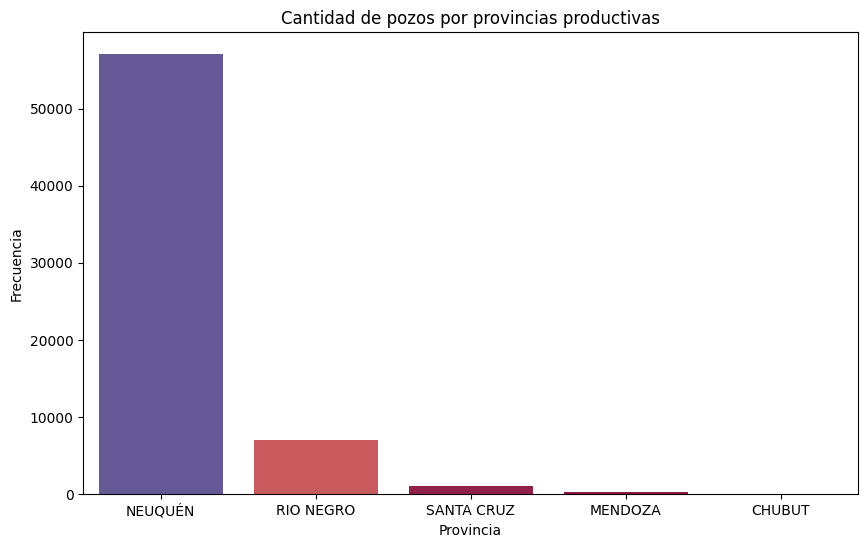

In [ ]:
frecuencia_datos = dt['Provincia'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_datos.index, y=frecuencia_datos.values, palette='Spectral', hue=frecuencia_datos, legend=False)

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.title('Cantidad de pozos por provincias productivas')

# Mostrar el gráfico
plt.show()


<ipython-input-20-3b6dc71a2ca6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='Tipo de Operación', order=dt['Tipo de Operación'].value_counts().index, palette='rainbow')


<Figure size 1200x600 with 0 Axes>

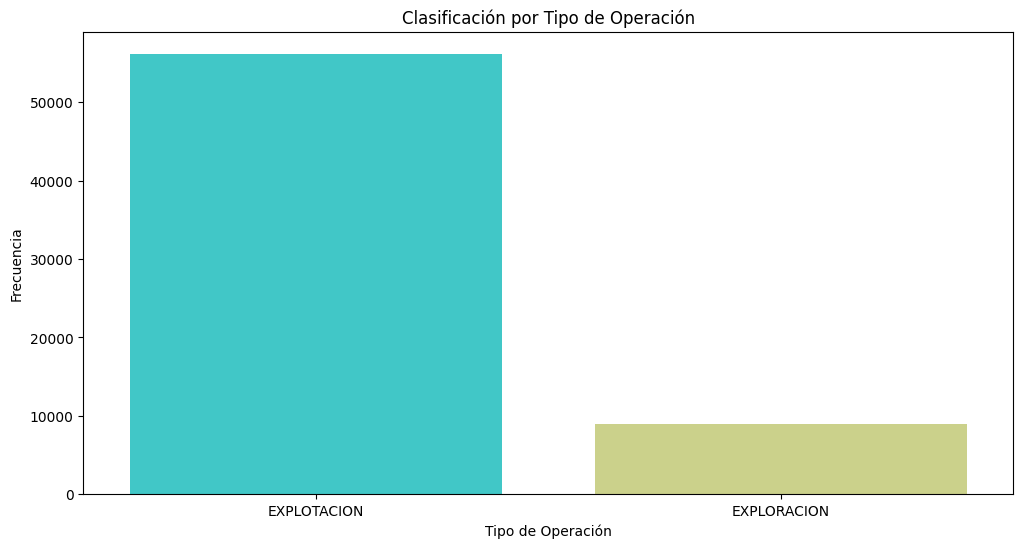

In [ ]:
# Ajustar el tamaño de las figuras de los gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para la variable 'Tipo de Operación'
plt.figure(figsize=(12, 6))
sns.countplot(data=dt, x='Tipo de Operación', order=dt['Tipo de Operación'].value_counts().index, palette='rainbow')
plt.title('Clasificación por Tipo de Operación')
plt.xlabel('Tipo de Operación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


<ipython-input-41-360755f7d1d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='Etapa de Operación', order=dt['Etapa de Operación'].value_counts().index, palette='rainbow')


<Figure size 1200x600 with 0 Axes>

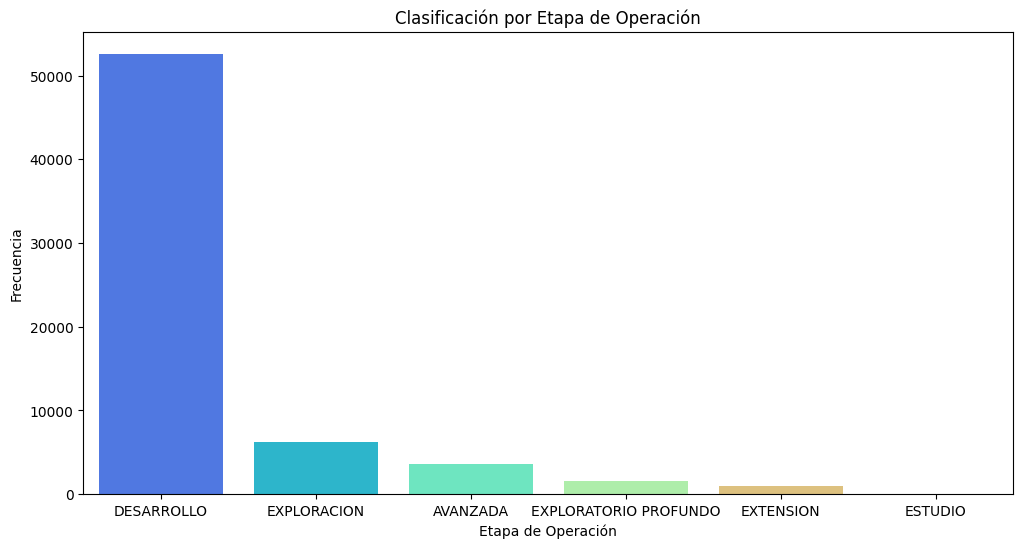

In [ ]:
# Ajustar el tamaño de las figuras de los gráficos
plt.figure(figsize=(12, 6))
# Gráfico de barras para la variable 'Etapa de Operación'
plt.figure(figsize=(12, 6))
sns.countplot(data=dt, x='Etapa de Operación', order=dt['Etapa de Operación'].value_counts().index, palette='rainbow')
plt.title('Clasificación por Etapa de Operación')
plt.xlabel('Etapa de Operación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

<ipython-input-42-e3b1fe1c8497>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='Cuenca', order=dt['Cuenca'].value_counts().index, palette='rainbow')


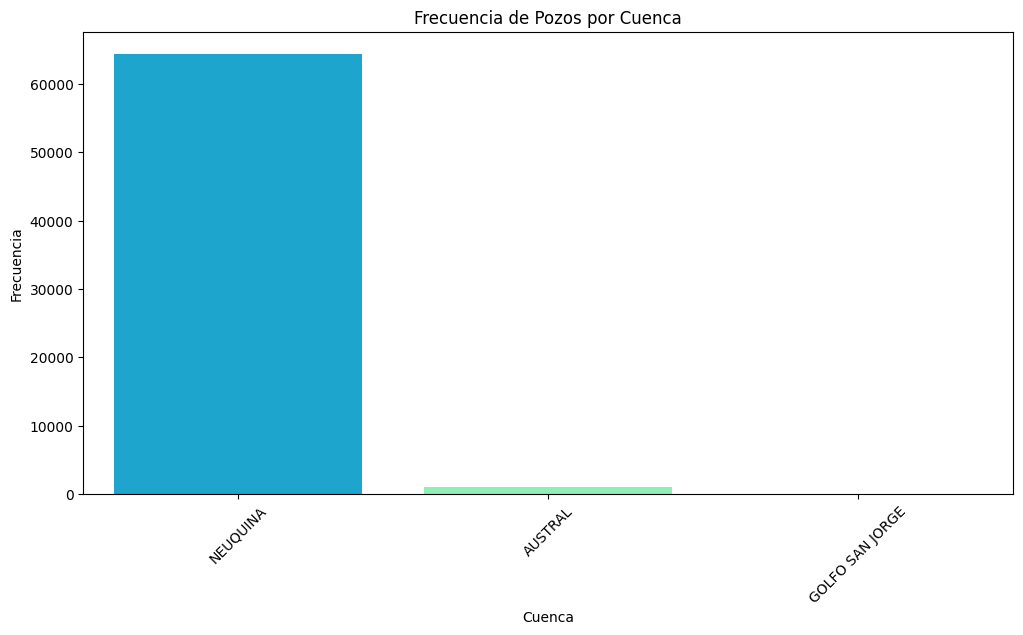

In [ ]:
# Ajustar el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para la variable 'Cuenca'
sns.countplot(data=dt, x='Cuenca', order=dt['Cuenca'].value_counts().index, palette='rainbow')
plt.title('Frecuencia de Pozos por Cuenca')
plt.xlabel('Cuenca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


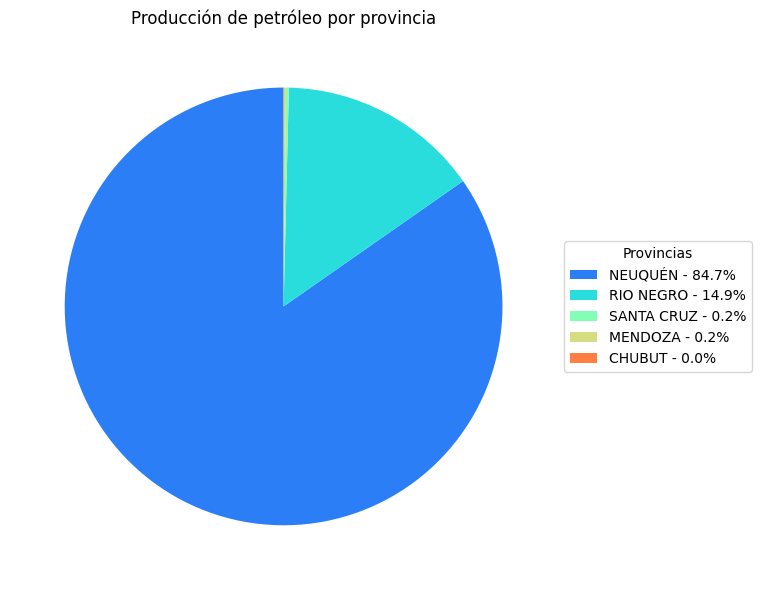

In [ ]:
# Agrupar datos y calcular la producción total de petróleo por provincia
datos_agrupados = dt.groupby('Provincia')['Producción Petróleo'].sum().reset_index()

# Ordenar las provincias por producción de petróleo
datos_agrupados = datos_agrupados.sort_values(by='Producción Petróleo', ascending=False)

# Calcular los porcentajes
total_produccion = datos_agrupados['Producción Petróleo'].sum()
datos_agrupados['Porcentaje'] = (datos_agrupados['Producción Petróleo'] / total_produccion) * 100

# Crear el gráfico de tortas
plt.figure(figsize=(10, 6))

# Paleta de colores
paleta = sns.color_palette("rainbow", len(datos_agrupados))

# Graficar sin etiquetas ni porcentajes
wedges, texts = plt.pie(datos_agrupados['Producción Petróleo'],
                        labels=None,
                        autopct=None,
                        colors=paleta,
                        startangle=90)

# Añadir el título
plt.title('Producción de petróleo por provincia')

# Crear las etiquetas para la leyenda
leyenda_labels = [f"{row['Provincia']} - {row['Porcentaje']:.1f}%" for index, row in datos_agrupados.iterrows()]

# Ajustar el diseño
plt.tight_layout()

# Añadir una leyenda
plt.legend(wedges, leyenda_labels, title="Provincias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

La producción total de petróleo en las provincias analizadas está dominada por Neuquén, que contribuye con un abrumador **84.8%** del total. Esta cifra destaca la preeminencia de **Neuquén como el principal productor de petróleo**, lo cual puede atribuirse a la presencia de vastos recursos yacimientos en la región, particularmente el yacimiento de Vaca Muerta, uno de los reservorios de shale más grandes del mundo.

En comparación, **Río Negro, aunque es el segundo mayor productor, representa solo el 14.9% del total**, lo que es significativamente menor en proporción a Neuquén. **Las demás provincias (Mendoza, Santa Cruz y Chubut) tienen una participación marginal en la producción total**, sumando colectivamente menos del 1%. Estas cifras indican que la producción de petróleo está extremadamente concentrada en Neuquén, con una distribución desigual entre las provincias.

Este patrón de concentración sugiere que cualquier análisis de la industria petrolera y políticas relacionadas deben focalizarse predominantemente en Neuquén. Asimismo, las provincias con menores participaciones podrían necesitar estrategias diferenciadas y apoyo para incrementar su producción y explorar nuevos yacimientos potenciales.

La notable disparidad en la producción también puede tener implicaciones en términos de inversión, infraestructura y desarrollo regional. Las políticas públicas y la asignación de recursos podria ir dirigida a la zona Neuquina, mas precisamente vaca muerta por su gran desidad de pozos, haciendo de la provincia
una potencial receptora de inversion en gran escala ya sea en extraccion de petroleo y gas como su posterior procesamiento.







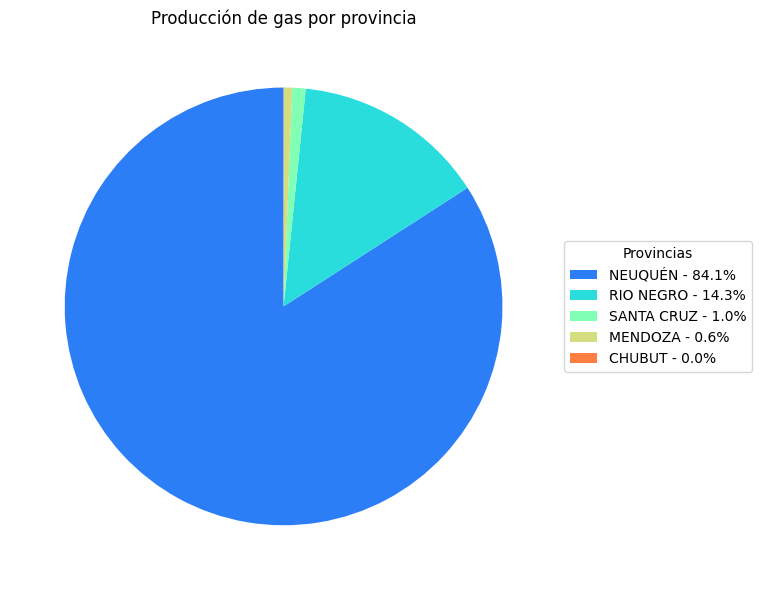

In [ ]:
# Agrupar datos y calcular la producción total de Gaspor provincia
datos_agrupados = dt.groupby('Provincia')['Producción Gas'].sum().reset_index()

# Ordenar las provincias por producción de petróleo
datos_agrupados = datos_agrupados.sort_values(by='Producción Gas', ascending=False)

# Calcular los porcentajes
total_produccion = datos_agrupados['Producción Gas'].sum()
datos_agrupados['Porcentaje'] = (datos_agrupados['Producción Gas'] / total_produccion) * 100

# Crear el gráfico de tortas
plt.figure(figsize=(10, 6))

# Paleta de colores
paleta = sns.color_palette("rainbow", len(datos_agrupados))

# Graficar sin etiquetas ni porcentajes
wedges, texts = plt.pie(datos_agrupados['Producción Gas'],
                        labels=None,
                        autopct=None,
                        colors=paleta,
                        startangle=90)

# Añadir el título
plt.title('Producción de gas por provincia')

# Crear las etiquetas para la leyenda
leyenda_labels = [f"{row['Provincia']} - {row['Porcentaje']:.1f}%" for index, row in datos_agrupados.iterrows()]

# Ajustar el diseño
plt.tight_layout()

# Añadir una leyenda
plt.legend(wedges, leyenda_labels, title="Provincias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**El análisis de la producción total de gas en las provincias muestra una clara concentración en Neuquén, la cual aporta un abrumador 84.6% de la producción total.** Este predominio se puede atribuir a la vasta explotación de recursos en la formación de Vaca Muerta, uno de los yacimientos de gas y petróleo no convencional más grandes del mundo.

**En segundo lugar**, aunque a una distancia considerable, **se encuentra Río Negro con un 14.3% de la producción.** Esta provincia, aunque significativamente menor en comparación con Neuquén, todavía juega un rol importante en el panorama energético del país.

**Mendoza, Santa Cruz y Chubut contribuyen marginalmente a la producción total, con 0.6%, 0.4% y 0.0% respectivamente.** La casi nula producción en estas provincias indica una menor explotación de recursos de gas o una capacidad productiva significativamente inferior en comparación con las provincias líderes.

En resumen, los datos reflejan una distribución altamente asimétrica de la producción de gas en Argentina, con Neuquén como el epicentro de la actividad gasífera.

El análisis de la producción promedio de gas, desglosado por provincias, revela una distribución desigual entre las regiones. La provincia de Mendoza se destaca como la principal productora, aportando un 32.1% del total de la producción. Le sigue de cerca Río Negro con un 28.6%, lo que indica una fuerte contribución de estas dos provincias en el contexto nacional.

Neuquén también tiene una participación significativa, con un 21.0% de la producción total, situándose como un importante actor en la industria del gas. Sin embargo, las provincias de Santa Cruz y Chubut presentan una menor participación, con un 11.2% y un 7.0% respectivamente, lo que sugiere una menor actividad o capacidad productiva en comparación con las otras provincias mencionadas.

En resumen, se puede observar que la producción de gas en Argentina está concentrada principalmente en las provincias de Mendoza, Río Negro y Neuquén, mientras que Santa Cruz y Chubut tienen un papel menos destacado en este sector. Esta distribución podría influir en las políticas energéticas y de desarrollo regional, orientando los esfuerzos hacia las áreas con mayor potencial productivo.

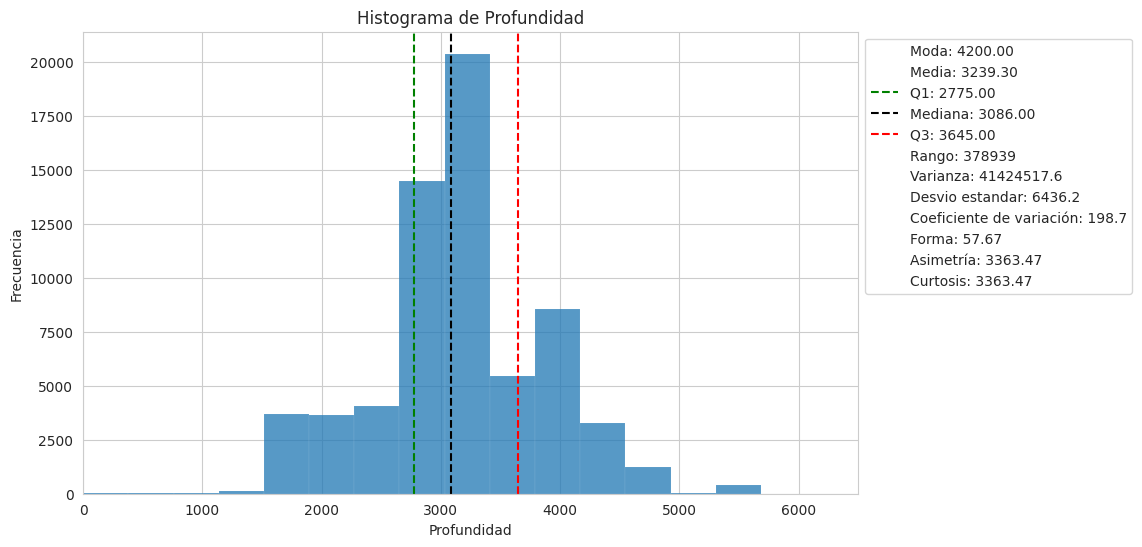

La distribución es Unimodal.
La distribución es Leptocúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.35% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.14% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.37% de los datos.
El rango está comprendido entre 0 y 378939.


In [ ]:
#Variables
columna = 'Profundidad'
min_x = 0
max_x = 6500
bins = 1000
titulo = 'Histograma de Profundidad'
y_label = 'Frecuencia'

#  Medidadas de centralización
moda = dt[columna].mode().iloc[0]
media = dt[columna].mean()
mediana = dt[columna].median()

# Cuartiles
Q1 = dt[columna].quantile(0.25)
Q2 = dt[columna].quantile(0.50)
Q3 = dt[columna].quantile(0.75)

# Determinar el número de modas
frecuencias = dt[columna].value_counts()
numero_de_modas = len(frecuencias[frecuencias == frecuencias.max()])

# Medidas de Dispersión
rango_max = dt[columna].max()
rango_min = dt[columna].min()
rango = dt[columna].max() - dt[columna].min()
varianza = dt[columna].var()
desvio_estandar = dt[columna].std()
coef_variacion = (desvio_estandar / dt[columna].mean()) * 100

# Forma
forma = dt[columna].skew()
asimetria = dt[columna].kurtosis()
curtosis = dt[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((dt[columna] >= Q1) & (dt[columna] <= Q2)).sum() / len(dt[columna]) * 100
concentracion_Q2_Q3 = ((dt[columna] >= Q2) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100
concentracion_Q1_Q3 = ((dt[columna] >= Q1) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(dt[columna], bins=bins)

#Leyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.2f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.2f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.2f}')

#plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(titulo)
plt.xlabel(columna)
plt.ylabel(y_label)
plt.xlim(min_x, max_x)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
if numero_de_modas == 1:
    print("La distribución es Unimodal.")
elif numero_de_modas == 2:
    print("La distribución es Bimodal.")
elif numero_de_modas > 2:
    print("La distribución es Multimodal.")
else:
    print("La distribución es Sin Moda.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.0f} y {rango_max:.0f}.")


**Histograma de Profundidad:**

Al sumergirnos en el grafico, encontramos que el **50% de los datos se concentran entre los cuartiles Q1 (2275)** y **Q3 (3645)**.

**El trayecto entre Q1 y la mediana (Q2) es más corto que el que va de la mediana a Q3.** Esto nos indica que **los datos están más densamente agrupados** en la primera mitad de nuestro viaje **entre Q1 y Q2**, y esta área coincide parcialmente con el lugar más frecuentado, la moda.

**Parece que estamos en una región bastante equilibrada, ya que la moda, la mediana y la media están muy cerca entre sí**. Esto sugiere que la distribución de los datos tiende a ser simétrica. Sin embargo, si miramos más de cerca, **observamos una ligera inclinación hacia la derecha, lo que se llama una asimetría positiva**.

Podemos observar una una **distribución unimodal y menos datos en sus barras laterales**, haciendo que sea una **distribución leptocúrtica.**

Al seguir explorando, encontramos que la **distancia entre Q1 y Q2**, que **contiene la moda**, representa el **25.31%** de nuestros datos. Igualmente, la distancia entre **Q2 y Q3** también representa otro **25.31%** de los datos. Así, en el tramo que va de **Q1 a Q3**, tenemos la mitad del total de datos, un **50.39%** para ser exactos.

Esto nos permite entender mejor cómo están distribuidos los datos. Sabemos ahora dónde se concentra la mayoría de los datosy cómo se agrupan alrededor de ciertos puntos clave.

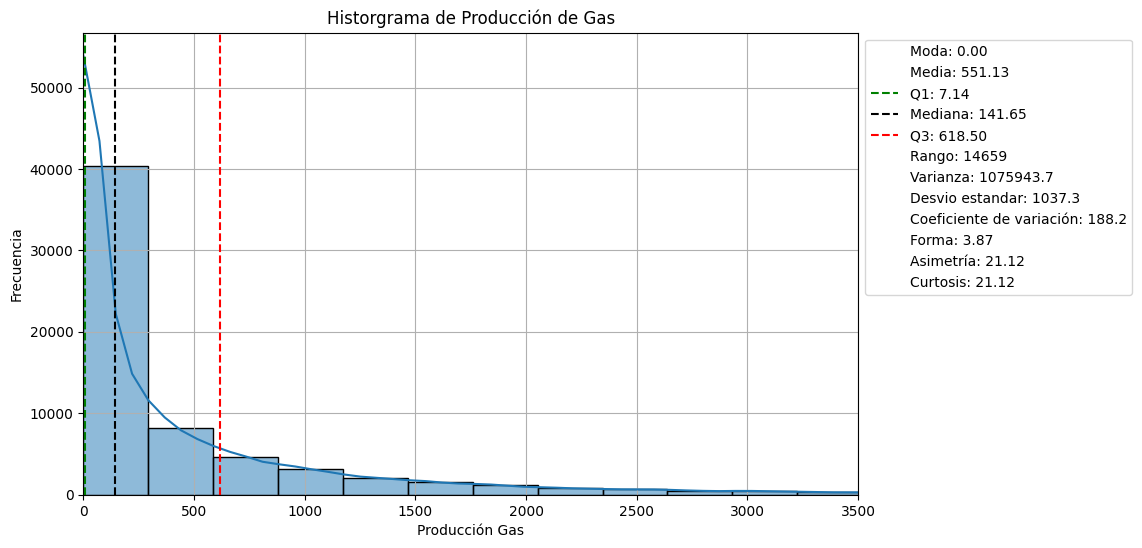

La distribución es Unimodal.
La distribución es Asimétrica Positiva.
La distribución es Leptocúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 25.00% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.00% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 50.00% de los datos.
El rango está comprendido entre 0.00 y 14659.36.


In [ ]:
#Variables
columna = 'Producción Gas'
min_x = 0
max_x = 3500
bins = 50
titulo = 'Historgrama de Producción de Gas'
y_label = 'Frecuencia'

#  Medidadas de centralización
moda = dt[columna].mode().iloc[0]
media = dt[columna].mean()
mediana = dt[columna].median()

# Cuartiles
Q1 = dt[columna].quantile(0.25)
Q2 = dt[columna].quantile(0.50)
Q3 = dt[columna].quantile(0.75)

# Determinar el número de modas
frecuencias = dt[columna].value_counts()
numero_de_modas = len(frecuencias[frecuencias == frecuencias.max()])

# Medidas de Dispersión
rango_max = dt[columna].max()
rango_min = dt[columna].min()
rango = dt[columna].max() - dt[columna].min()
varianza = dt[columna].var()
desvio_estandar = dt[columna].std()
coef_variacion = (desvio_estandar / dt[columna].mean()) * 100

# Forma
forma = dt[columna].skew()
asimetria = dt[columna].kurtosis()
curtosis = dt[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((dt[columna] >= Q1) & (dt[columna] <= Q2)).sum() / len(dt[columna]) * 100
concentracion_Q2_Q3 = ((dt[columna] >= Q2) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100
concentracion_Q1_Q3 = ((dt[columna] >= Q1) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(dt[columna], bins=bins, kde=True, kde_kws={'bw_adjust': 0.5})

#Leyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.2f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.2f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.2f}')

#plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(titulo)
plt.xlabel(columna)
plt.ylabel(y_label)
plt.xlim(min_x, max_x)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
if numero_de_modas == 1:
    print("La distribución es Unimodal.")
elif numero_de_modas == 2:
    print("La distribución es Bimodal.")
elif numero_de_modas > 2:
    print("La distribución es Multimodal.")
else:
    print("La distribución es Sin Moda.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.2f} y {rango_max:.2f}.")


**Histograma de Producción de Gas:**

En nuestro análisis, **observamos que la distribución está inclinada hacia la derecha, una característica conocida como asimetría positiva**. Esto significa que hay una cola larga de valores altos a la derecha, aunque la mayoría de los datos se agrupan hacia la izquierda del histograma.

Además, **la distribución es leptocúrtica**, **indicando que los datos están muy concentrados alrededor de la moda**, con picos más altos y colas más gruesas en comparación con una distribución normal.

Al profundizar más, notamos que el rango total de los datos de producción de gas está comprendido entre 0.00 y 14659.36.

Entre los cuartiles **Q1 (7.14)** y** Q3 (618.5)** se concentra el **50%** de los datos.

**Al desglosar estos cuartiles, observamos que:**

**Q1 a Q2 (Mediana):**La distancia entre Q1 y la mediana es menor que entre la mediana y Q3. Esto nos indica que la mayor densidad de datos se encuentra entre Q1 y Q2, una región que coincide con la moda, el punto de mayor frecuencia en nuestros datos.

**Q2 a Q3:** La distancia entre la mediana (Q2) y Q3 es mayor, representando una dispersión más amplia de datos. Este segmento también representa el 25% de los datos, pero con una distribución más dispersa en comparación con el segmento Q1-Q2.

**Q1 a Q3:** En total, el rango intercuartil de Q1 a Q3 abarca el 50% de los datos, concentrando la mayoría de la producción de gas en este rango intermedio.
Conclusiones


**La mayor densidad de datos entre Q1 y Q2**, coincidiendo con la moda, sugiere que muchos valores de producción se agrupan en niveles bajos, con una dispersión menor a medida que avanzamos hacia valores más altos. **La asimetría positiva y la distribución unimodal nos indican que, aunque hay algunos valores de producción de gas muy altos, la mayoría de los datos se encuentran en niveles más bajos.**

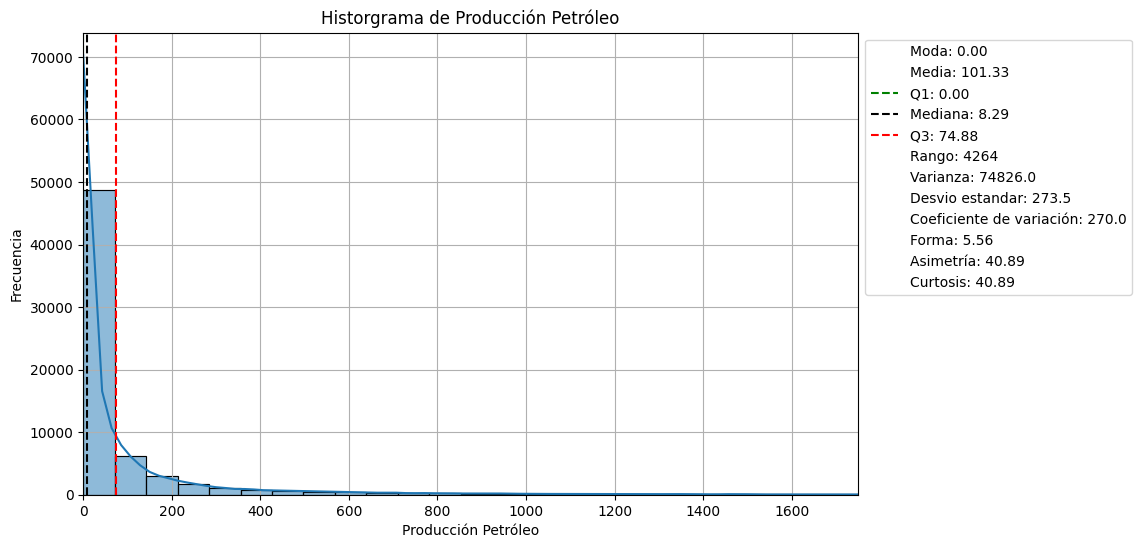

La distribución es Unimodal.
La distribución es Asimétrica Positiva.
La distribución es Leptocúrtica.
Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: 50.00% de los datos.
Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: 25.00% de los datos.
Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: 75.00% de los datos.
El rango está comprendido entre -0.00 y 4263.81.


In [ ]:
#Variables
columna = 'Producción Petróleo'
min_x = 0
max_x = 1750
bins = 60
titulo = 'Historgrama de Producción Petróleo'
y_label = 'Frecuencia'

#  Medidadas de centralización
moda = dt[columna].mode().iloc[0]
media = dt[columna].mean()
mediana = dt[columna].median()

# Cuartiles
Q1 = dt[columna].quantile(0.25)
Q2 = dt[columna].quantile(0.50)
Q3 = dt[columna].quantile(0.75)

# Determinar el número de modas
frecuencias = dt[columna].value_counts()
numero_de_modas = len(frecuencias[frecuencias == frecuencias.max()])

# Medidas de Dispersión
rango_max = dt[columna].max()
rango_min = dt[columna].min()
rango = dt[columna].max() - dt[columna].min()
varianza = dt[columna].var()
desvio_estandar = dt[columna].std()
coef_variacion = (desvio_estandar / dt[columna].mean()) * 100

# Forma
forma = dt[columna].skew()
asimetria = dt[columna].kurtosis()
curtosis = dt[columna].kurtosis()

# Calcular la concentración de datos
concentracion_Q1_Q2 = ((dt[columna] >= Q1) & (dt[columna] <= Q2)).sum() / len(dt[columna]) * 100
concentracion_Q2_Q3 = ((dt[columna] >= Q2) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100
concentracion_Q1_Q3 = ((dt[columna] >= Q1) & (dt[columna] <= Q3)).sum() / len(dt[columna]) * 100

# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(dt[columna], bins=bins, kde=True, kde_kws={'bw_adjust': 0.5})

#Leyendas
plt.axvline(moda, color='k', linestyle='--', label=f'Moda: {moda:.2f}', visible=False)
plt.axvline(media, color='k', linestyle='--', label=f'Media: {media:.2f}', visible=False)

plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(mediana, color='k', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.2f}')

#plt.axvline(rango_max , color='k', linestyle='--', label=f'Rango Máximo: {rango_max:.0f}', visible=False)
plt.axvline(rango , color='k', linestyle='--', label=f'Rango: {rango:.0f}', visible=False)
plt.axvline(varianza , color='k', linestyle='--', label=f'Varianza: {varianza:.1f}', visible=False)
plt.axvline(desvio_estandar , color='k', linestyle='--', label=f'Desvio estandar: {desvio_estandar:.1f}', visible=False)
plt.axvline(coef_variacion , color='k', linestyle='--', label=f'Coeficiente de variación: {coef_variacion:.1f}', visible=False)

plt.axvline(forma, color='k', linestyle='--', label=f'Forma: {forma:.2f}',  visible=False)
plt.axvline(asimetria, color='k', linestyle='--', label=f'Asimetría: {asimetria:.2f}',  visible=False)
plt.axvline(curtosis, color='k', linestyle='--', label=f'Curtosis: {curtosis:.2f}',  visible=False)

plt.title(titulo)
plt.xlabel(columna)
plt.ylabel(y_label)
plt.xlim(min_x, max_x)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# Clasificación de la cantidad de valores que repiten la mayor frecuencia
if numero_de_modas == 1:
    print("La distribución es Unimodal.")
elif numero_de_modas == 2:
    print("La distribución es Bimodal.")
elif numero_de_modas > 2:
    print("La distribución es Multimodal.")
else:
    print("La distribución es Sin Moda.")

# Clasificar segun la simetría de los datos con respecto a la media.
if moda < mediana < media:
    print("La distribución es Asimétrica Positiva.")
if media == mediana == moda:
    print("La distribución es Simétrica.")
if moda > mediana > media:
    print("La distribución es Asimétrica Negativa.")

# Clasificar segun grado de concentración de una distribución alrededor de su media.
if curtosis > 3:
    print("La distribución es Leptocúrtica.")
elif curtosis == 3:
    print("La distribución es Mesocúrtica.")
elif curtosis < 3:
    print("La distribución es Platicúrtica.")


# Imprimir concentración entre Q1 y Q2
print(f"Dentro de la distancia intercuartil Q2-Q1, vemos que contiene a la moda y representa el: {concentracion_Q1_Q2:.2f}% de los datos.")

# Imprimir concentración entre Q2 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q2, vemos que representa el: {concentracion_Q2_Q3:.2f}% de los datos.")

# Imprimir concentración en Q1 y Q3
print(f"Dentro de la distancia intercuartil Q3-Q1, vemos que representa el: {concentracion_Q1_Q3:.2f}% de los datos.")

# Imprimir el rango y los cuartiles
print(f"El rango está comprendido entre {rango_min:.2f} y {rango_max:.2f}.")


**Historgrama de Producción de Petróleo**

Nuestro objetivo es entender cómo se distribuyen los datos de producción de petróleo. A medida que avanzamos, descubrimos que la distribución de los datos tiene una sola cima, lo que los estadísticos llaman una **distribución unimodal**.

Al profundizar en los datos, notamos algo importante: **la distribución está inclinada hacia la derecha, una característica conocida como asimetría positiva.** Esto significa que hay una cola larga de valores altos a la derecha, aunque la mayoría de los datos se agrupan hacia la izquierda del histograma.

Además, **la distribución es leptocúrtica**, lo que implica que los datos están concentrados alrededor de la moda con colas más gruesas y picos más altos. Esto nos dice que hay menos datos en los extremos y más datos cerca del valor central.

Encontramos que la distancia intercuartil **entre el primer cuartil (Q1) y la mediana (Q2) contiene la moda y representa el 50% de los datos**. En otras palabras, **la mitad de nuestros datos de producción de petróleo se encuentra en esta primera mitad del rango intercuartil**. Esta área, además, coincide con el intervalo de mayor frecuencia, lo que indica que aquí es donde se encuentra la mayor densidad de datos.

Al mirar **entre la mediana (Q2) y el tercer cuartil (Q3)**, descubrimos que esta sección representa el **25% de los datos**. Esto significa que el siguiente cuarto de nuestros datos se encuentra en esta región, confirmando la mayor concentración de datos entre Q1 y Q2.

En total, el rango entre Q1 y Q3 abarca el 75% de los datos, mostrando que la mayoría de los datos de producción de petróleo se concentran en este rango intermedio.

Sin embargo, al observar Q1, notamos algo peculiar: Q1 representa el 25% de los datos, pero no se visualiza claramente en el histograma porque coincide con la moda. En otras palabras, en el intervalo de clase 0-50, el porcentaje de datos ya es mayor que el 25%. Esto se debe a que este intervalo coincide con el punto de mayor frecuencia, haciendo que Q1 coincida gráficamente con cero.

Finalmente, **la mayor densidad de datos se encuentra entre Q1 y la mediana**, resaltando que en esta sección se concentra la mayor parte de la producción de petróleo.

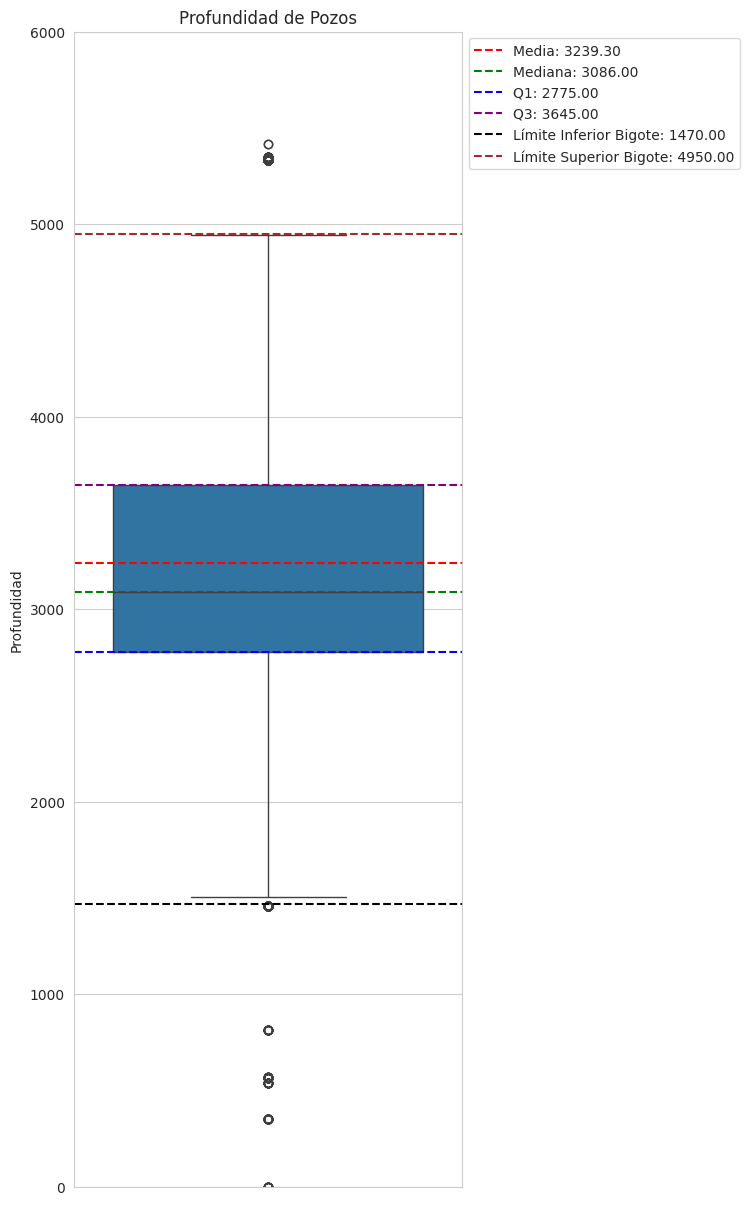

In [ ]:
#Variables
y_label = 'Profundidad'
x_label = ''
titulo = 'Profundidad de Pozos'
y_min = 0
y_max = 6000
columna ='Profundidad'

# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Datos
data = dt[columna]

# Calcular medidas de centralización y dispersión
media = data.mean()
mediana = data.median()
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calcular los límites de los bigotes
IQR = Q3 - Q1  # Rango intercuartílico
whisker_min = Q1 - 1.5 * IQR
whisker_max = Q3 + 1.5 * IQR

# Graficar
plt.figure(figsize=(5, 15))
sns.boxplot(y=data)
plt.axhline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
plt.axhline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axhline(Q1, color='b', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')
plt.axhline(whisker_min, color='black', linestyle='--', label=f'Límite Inferior Bigote: {whisker_min:.2f}')
plt.axhline(whisker_max, color='brown', linestyle='--', label=f'Límite Superior Bigote: {whisker_max:.2f}')

plt.legend()
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title(titulo)
plt.ylim(y_min, y_max)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**En el análisis de la profundidad de los pozos petrolíferos, observamos lo siguiente a partir del boxplot:**

* Los valores del primer cuartil (Q1) y del tercer cuartil (Q3) son 2275 y 3645 respectivamente, lo que implica que el 50% central de los datos se encuentra entre estas dos cifras.

* Notamos que la distancia entre el primer cuartil (Q1) y la mediana (Q2) es menor que la distancia entre la mediana (Q2) y el tercer cuartil (Q3). Esto sugiere una mayor densidad de datos entre Q1 y Q2.

* La moda, determinada a partir del histograma con los intervalos de clase elegidos, se encuentra en el rango de 3000 a 3400, y coincide parcialmente con el segmento entre Q1 y Q2.

* El rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1, es de 1370 (3645 - 2275 = 1370). Este valor mide la dispersión de la mitad central de los datos.

* Identificamos los outliers utilizando el criterio de 1.5 veces el IQR. Así, los valores menores a 1470 y mayores a 4950 se consideran outliers. Los límites del bigote inferior e inferior se establecen en estos puntos.

* La mayoría de los outliers se encuentran por debajo del bigote inferior, indicando una concentración mayor de valores extremos bajos.

* El boxplot sugiere una ligera asimetría positiva, ya que la distancia desde la mediana hasta Q3 es mayor que desde la mediana hasta Q1, indicando una cola más larga hacia la derecha.

**Este análisis proporciona una comprensión detallada de la distribución de las profundidades de los pozos petrolíferos, destacando la concentración central de los datos y la presencia de outliers principalmente en el extremo inferior.**

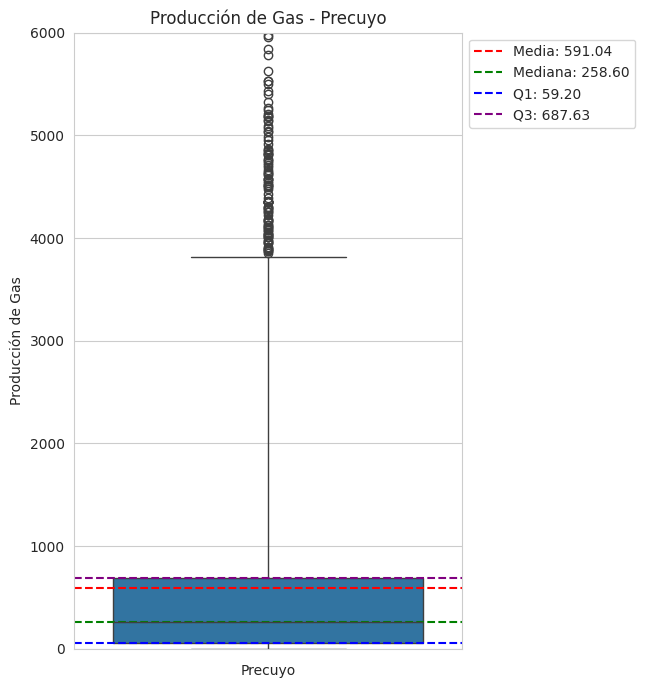

In [ ]:
#Variables
y_label = 'Producción de Gas'
x_label = 'Precuyo'
titulo = 'Producción de Gas - Precuyo'
y_min = 0
y_max = 6000
columna = 'Formación Productiva'
valor = 'PRECUYO'

# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Filtrar los datos por la formación
produccion_precuyo = dt[dt[columna] == valor]

# Obtener la serie de datos para la producción de petróleo de la formación
serie_prod_gas = produccion_precuyo['Producción Gas']

# Calcular medidas de centralización y dispersión
media = serie_prod_gas.mean()
mediana = serie_prod_gas.median()
Q1 = serie_prod_gas.quantile(0.25)
Q3 = serie_prod_gas.quantile(0.75)

# Graficar
plt.figure(figsize=(5, 8))
sns.boxplot(y=serie_prod_gas, whis=5)
plt.axhline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
plt.axhline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axhline(Q1, color='b', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

plt.legend()
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title(titulo)
plt.ylim(y_min, y_max)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**En el análisis de la producción de gas en Precuyo, se observa lo siguiente a partir del boxplot:**

* Los valores del primer cuartil (Q1) y del tercer cuartil (Q3) son 59.2 y 687.63 respectivamente, lo que implica que el 50% central de los datos se encuentra entre estas dos cifras.

* La mayor densidad de los datos se encuentra entre el primer cuartil (Q1) y la mediana (Q2), indicando que una gran parte de los datos se agrupan en la mitad inferior del rango intercuartílico.

* El rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1, es de 628.43 (687.63 - 59.2 = 628.43). Este valor mide la dispersión de la mitad central de los datos.

* Identificamos los outliers utilizando el criterio de 1.5 veces el IQR. En este caso, todos los outliers se encuentran por encima del límite del bigote superior. Este límite se establece a partir de Q3 más 1.5 veces el IQR.

* La distribución de la producción de gas es asimétrica positiva, ya que la distancia desde la mediana hasta Q3 es mayor que desde la mediana hasta Q1, indicando una cola más larga hacia la derecha y una concentración de valores más altos en la parte superior de la distribución.

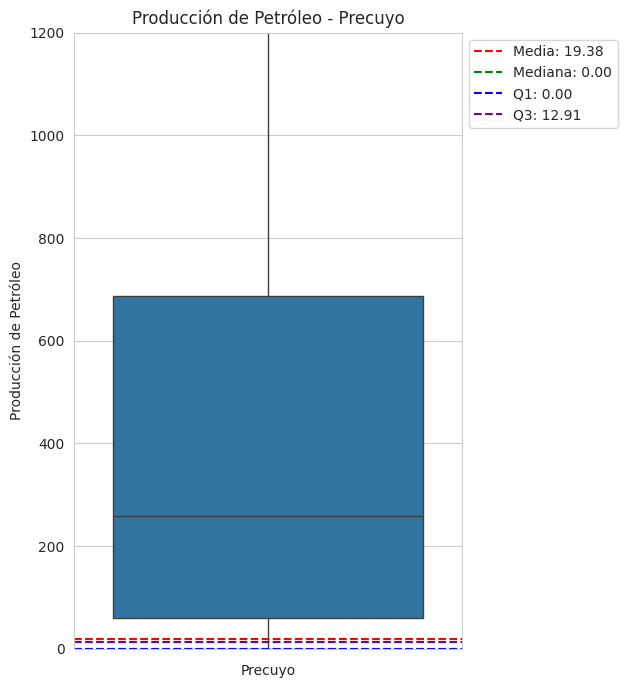

In [ ]:
#Variables
y_label = 'Producción de Petróleo'
x_label = 'Precuyo'
titulo = 'Producción de Petróleo - Precuyo'
y_min = 0
y_max = 1200
columna = 'Formación Productiva'
valor = 'PRECUYO'

# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Filtrar los datos por la formación
produccion_precuyo = dt[dt[columna] == valor]

# Obtener la serie de datos para la producción de petróleo de la formación
serie_prod_petroleo = produccion_precuyo['Producción Petróleo']

# Calcular medidas de centralización y dispersión
media = serie_prod_petroleo.mean()
mediana = serie_prod_petroleo.median()
Q1 = serie_prod_petroleo.quantile(0.25)
Q3 = serie_prod_petroleo.quantile(0.75)

# Graficar
plt.figure(figsize=(5, 8))
sns.boxplot(y=serie_prod_gas, whis=5)
plt.axhline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
plt.axhline(mediana, color='g', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axhline(Q1, color='b', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axhline(Q3, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}')

plt.legend()
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title(titulo)
plt.ylim(y_min, y_max)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

En el análisis de la producción de petróleo en Precuyo, se observa lo siguiente a partir del boxplot:

* Los valores del primer cuartil (Q1) y de la mediana (Q2) son ambos cero, lo que sugiere que una parte significativa de los datos de producción de petróleo se concentra en valores muy bajos, incluso llegando a cero. Esto está relacionado con el intervalo de mayor frecuencia o moda, que se encuentra en los valores bajos de producción, con un límite inferior en cero.

* La concentración principal de los datos se encuentra entre Q1 y Q3, lo que representa el 50% del total de los datos. Esta concentración indica que la mayoría de los valores se agrupan en este rango.
Los valores de Q1=0 y Q3=12.96 son bajos porque **LA FORMACION PRECUYO ES PRINCIPALMENTE GASIFERA**.

* La distancia entre el tercer cuartil (Q3) y el valor máximo, que es un outlier cercano a 4000, representa el restante 25% de los datos. Esta distancia es considerable, lo que sugiere una dispersión significativa de los datos en este extremo superior, indicando una cola larga hacia la derecha de la distribución.

* La distribución de la producción de gas en Precuyo se caracteriza por ser asimétrica positiva, lo que significa que hay una concentración de valores más bajos y una dispersión más pronunciada en el extremo superior de la distribución.

# **Análisis Descriptivo - Análisis Bivariado**

#Análisis exploratorio a través de la visualización e interpretación de gráficos de dispersión ó *Scatter Plots*

A continuación, se grafica el mismo Scatter Plot entre volumenes de agua y petroleo producidos

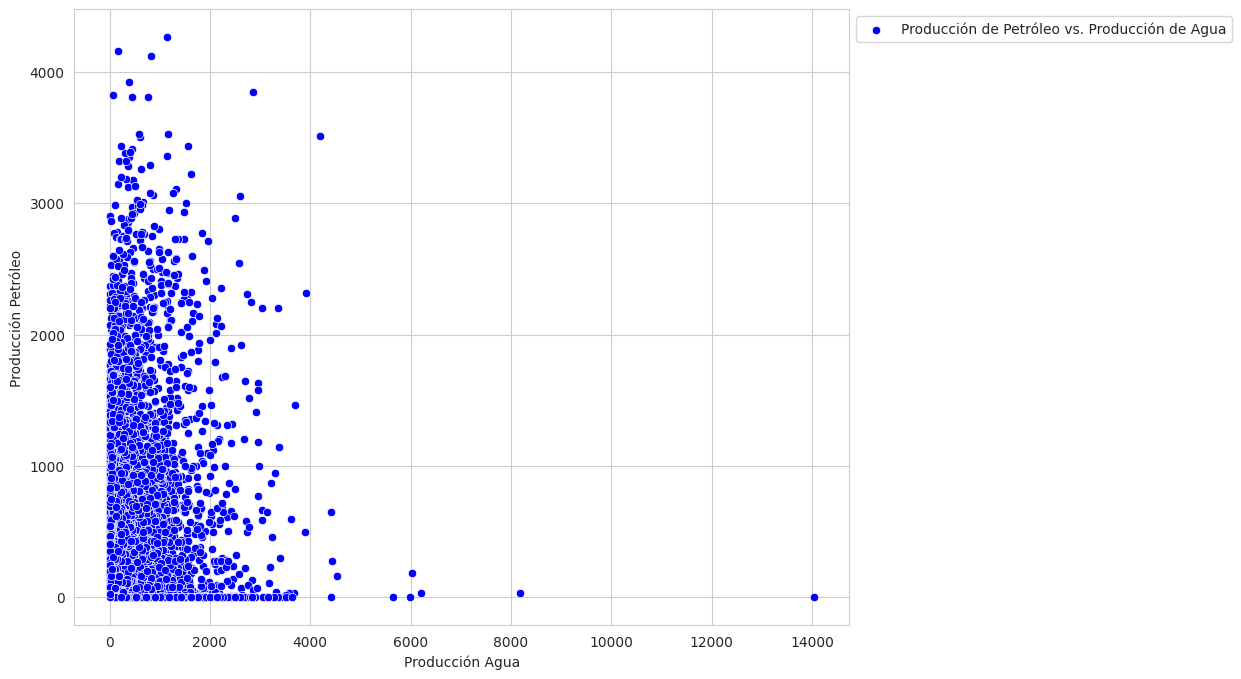

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Producción Agua", y="Producción Petróleo", data=dt, label="Producción de Petróleo vs. Producción de Agua", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

A continuación, se grafica el mismo Scatter Plot entre volumenes de agua y petroleo producidos, restringido a la producción del año 2016

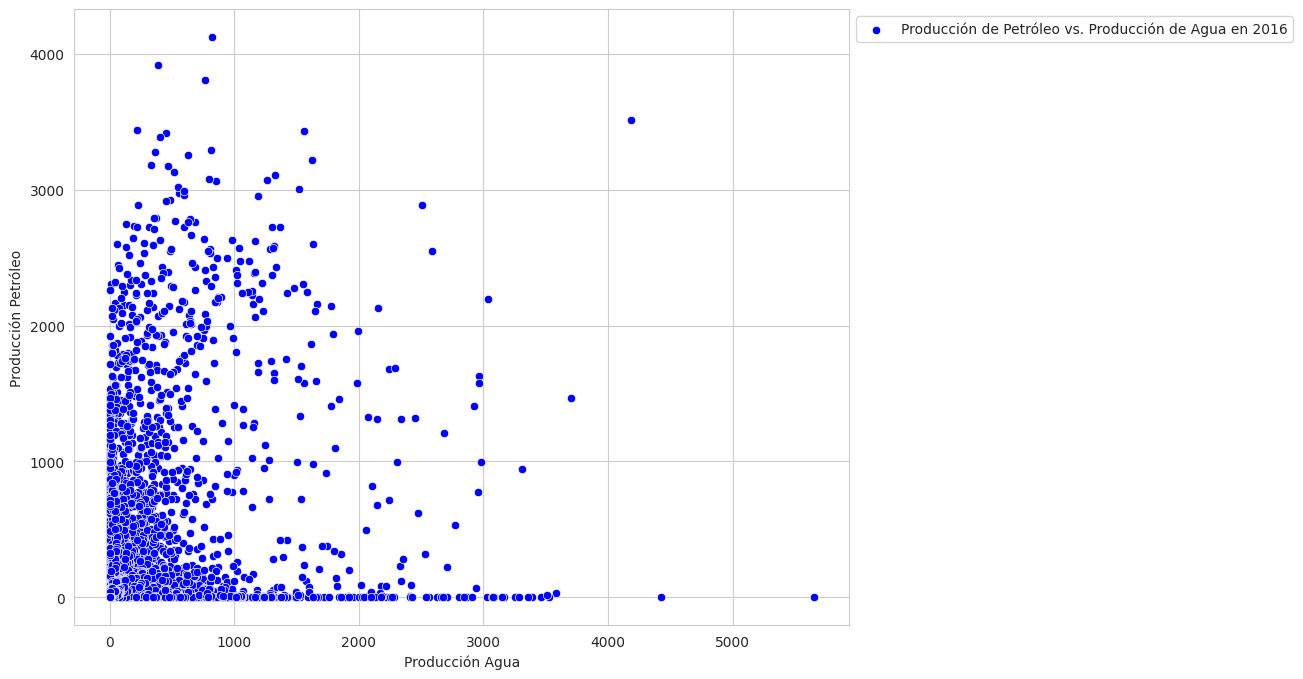

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

filtro = dt[dt['Año'] == 2016]

# Grafica los datos con otro color
sns.scatterplot(x="Producción Agua", y="Producción Petróleo", data=filtro, label="Producción de Petróleo vs. Producción de Agua en 2016", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

A continuación, se grafica el mismo Scatter Plot entre volumenes de agua y petroleo producidos, restringido a la Formación Vaca Muerta

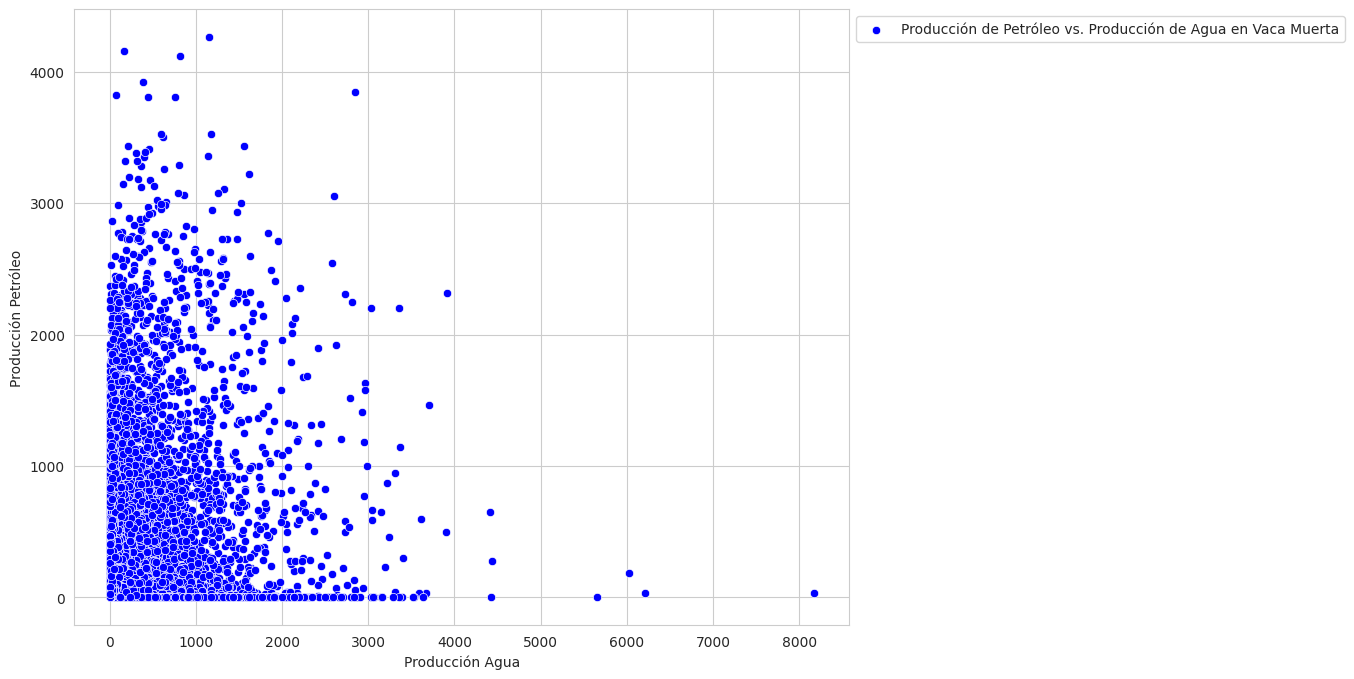

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

filtro = dt[dt['Formación Productiva'] == 'VACA MUERTA']

# Grafica los datos con otro color
sns.scatterplot(x="Producción Agua", y="Producción Petróleo", data=filtro, label="Producción de Petróleo vs. Producción de Agua en Vaca Muerta", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

A continuación, se grafica el Scatter Plot entre volumenes de agua y petroleo producidos, restringido a la Formación Vaca Muerta y al yacimiento Bandurria Sur, para analizar si la correlación aumenta respecto al gráfico anterior.

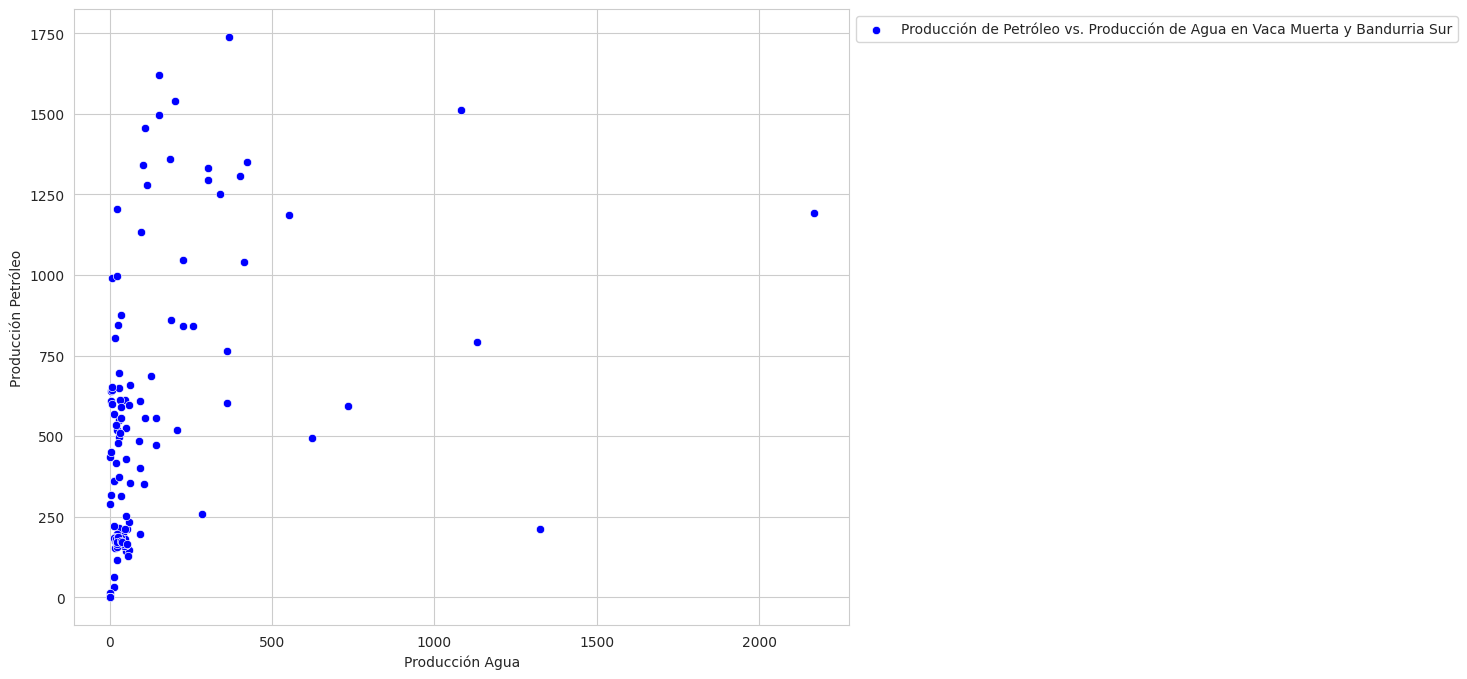

In [ ]:
# Filtrar
filtro = dt[(dt['Formación Productiva'] == 'VACA MUERTA') & (dt['Área Yacimiento'] == 'BANDURRIA SUR')]

# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Producción Agua", y="Producción Petróleo", data=filtro, label="Producción de Petróleo vs. Producción de Agua en Vaca Muerta y Bandurria Sur", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()


A continuación, se grafica el Scatter Plot entre volumenes de gas y petróleo producidos, restringido a la Formación Precuyo.

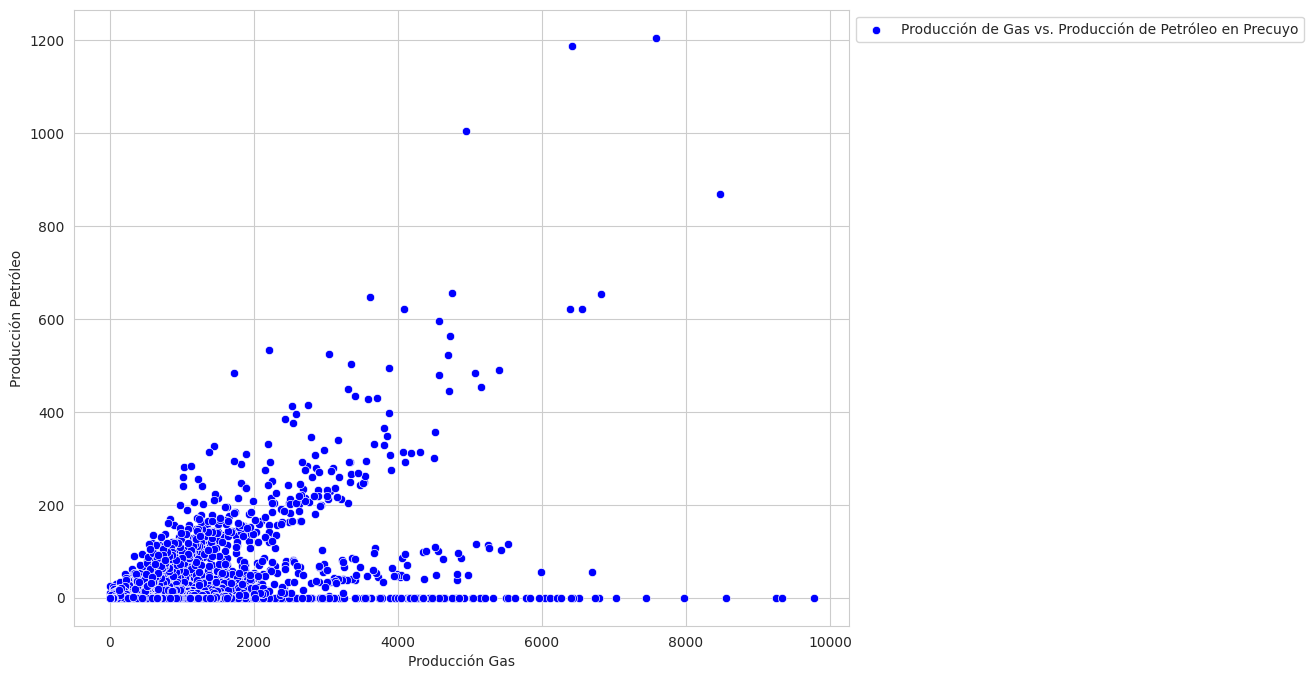

In [ ]:
# Filtrar
filtro = dt[(dt['Formación Productiva'] == 'PRECUYO')]

# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Producción Gas", y="Producción Petróleo", data=filtro, label="Producción de Gas vs. Producción de Petróleo en Precuyo", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

Al graficar el Scatter Plot entre la producción de gas y petróleo para los pozos con objetivo en la formación Precuyano se evidencia una buena correlación entre las variables de producción de petróleo y gas. **La linealidad entre las variables se observa para valores de producción de petróleo mayores a 165**.

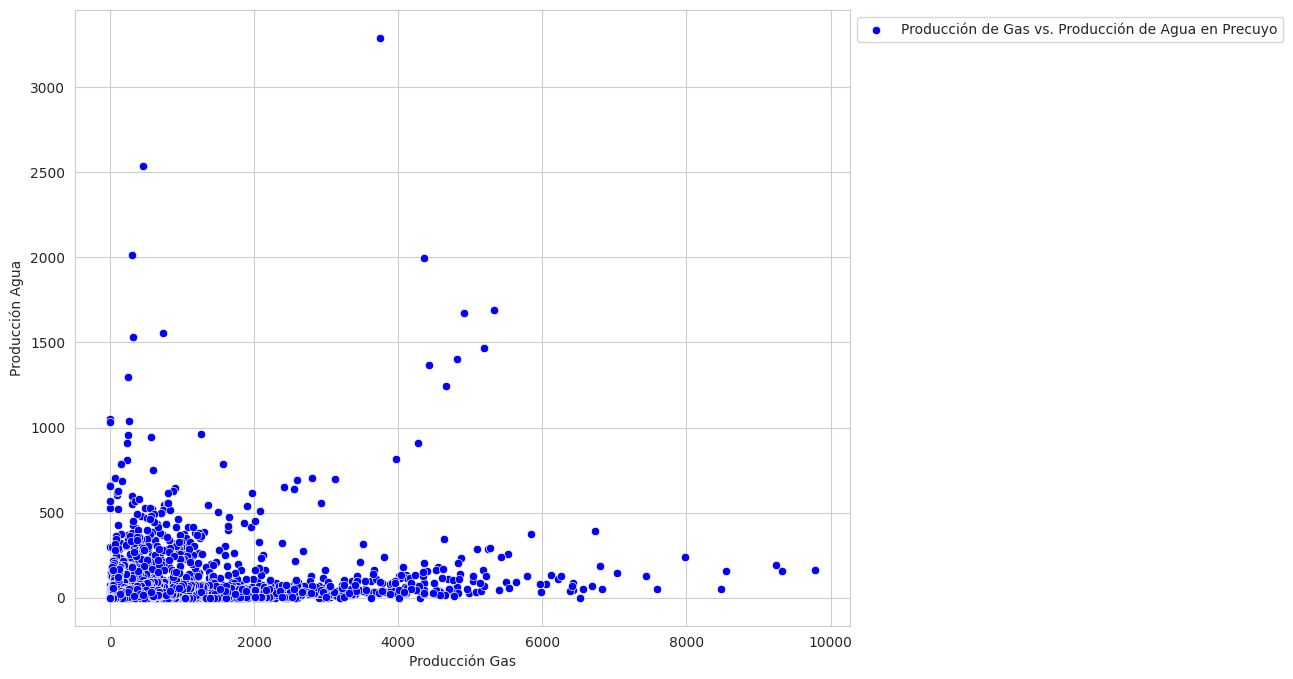

In [ ]:
# Filtrar
filtro = dt[(dt['Formación Productiva'] == 'PRECUYO')]

# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Producción Gas", y="Producción Agua", data=filtro, label="Producción de Gas vs. Producción de Agua en Precuyo", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

Al graficar el Scatter Plot entre la producción de gas y agua para los pozos con objetivo en la formación Precuyano se evidencia una buena correlación entre las variables según las siguientes condiciones: **Producción de Agua mayor a 400 y Producción de Gas mayor a 850**.  

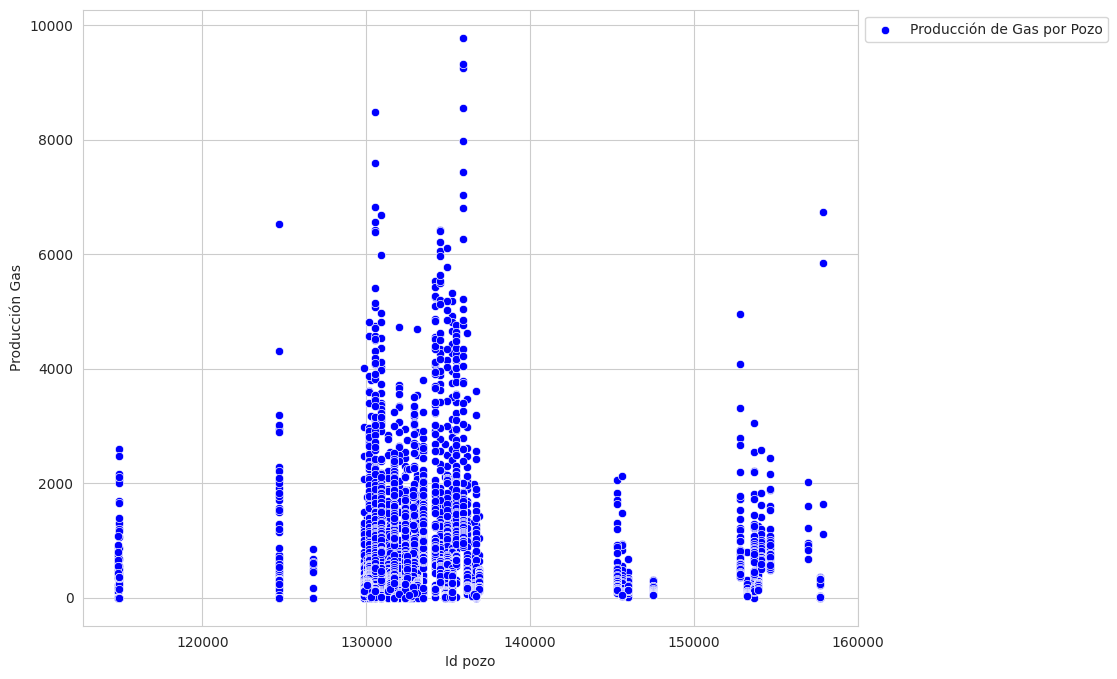

In [ ]:
# Filtrar
filtro = dt[(dt['Formación Productiva'] == 'PRECUYO')]

# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Id pozo", y="Producción Gas", data=filtro, label="Producción de Gas por Pozo", color='blue')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

El Scatter Plot entre Id pozo y Producción Gas filtrado a la Formación Precuyano pone en evidencia que la producción de este fluido proveniente del Precuyo es muy variable con pozos improductivos a pozos muy productivos. **ESTO ESTA RELACIONADO A LA PRESENCIA O NO DE FRACTURAS NATURALES**.

A continuacion, se grafica el grado de correlación entre la producción de gas y petróleo para los diferentes pozos con la tercer variable formación visualizada en color, con la paleta "bright", a través de la función .scatterplot de Seaborn.

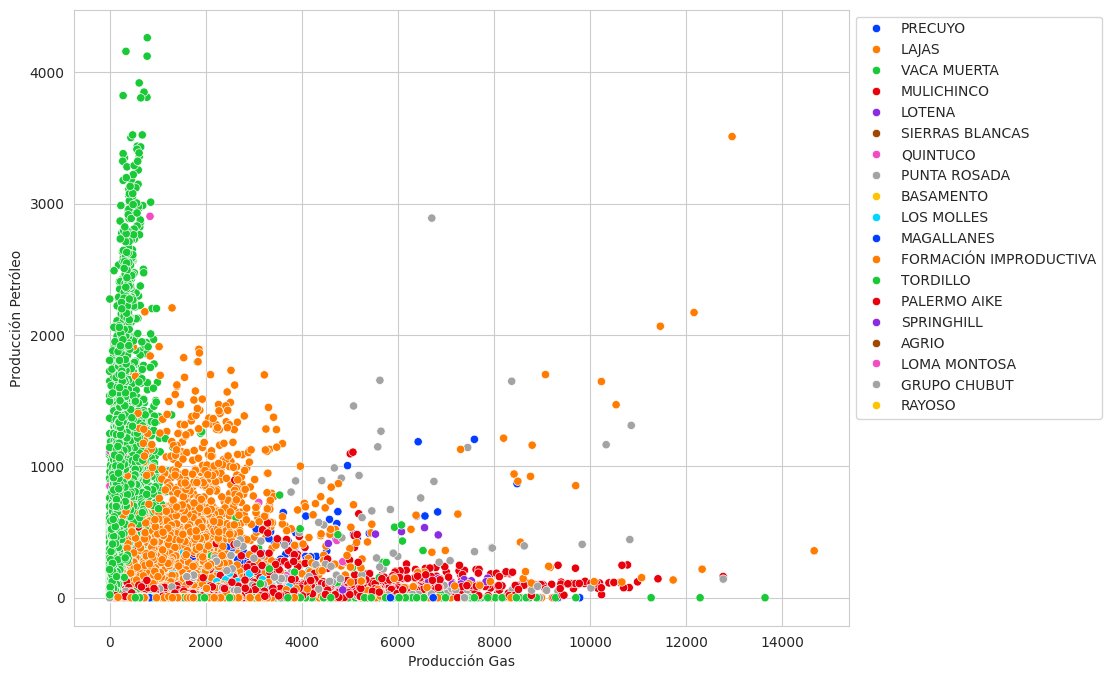

In [ ]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Grafica los datos con otro color
sns.scatterplot(x="Producción Gas", y="Producción Petróleo", data=dt, hue='Formación Productiva', palette='bright')

# Ubica la leyenda en la esquina superior izquierda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

A continuación, se grafica el grado de correlación entre la producción de gas y petróleo para los diferentes pozos con la tercer variable Formación Productiva; paleta "Bright". A diferencia del gráfico anterior, se aplica la función .lmplot de Seaborn que permite visualizar la recta de correlación por grupo de datos.

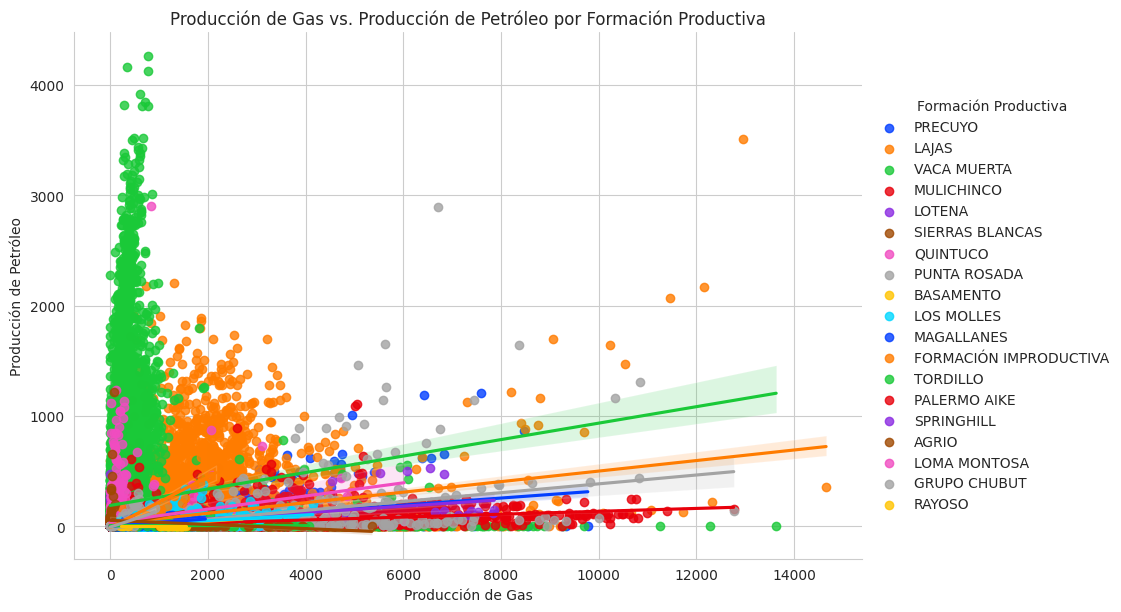

In [ ]:
# Crear el gráfico
sns.lmplot(data=dt, x="Producción Gas", y="Producción Petróleo", hue='Formación Productiva', palette='bright', height=6, aspect=1.5)

# Agregar título y etiquetas a los ejes
plt.title("Producción de Gas vs. Producción de Petróleo por Formación Productiva")
plt.xlabel("Producción de Gas")
plt.ylabel("Producción de Petróleo")

# Mostrar el gráfico
plt.show()


A continuación, se grafica el grado de correlación entre las principales variables de producción para todos los pozos con restricción a la variable Formación Precuyo, a través de la función .pairplot de Seaborn sin paleta de color.

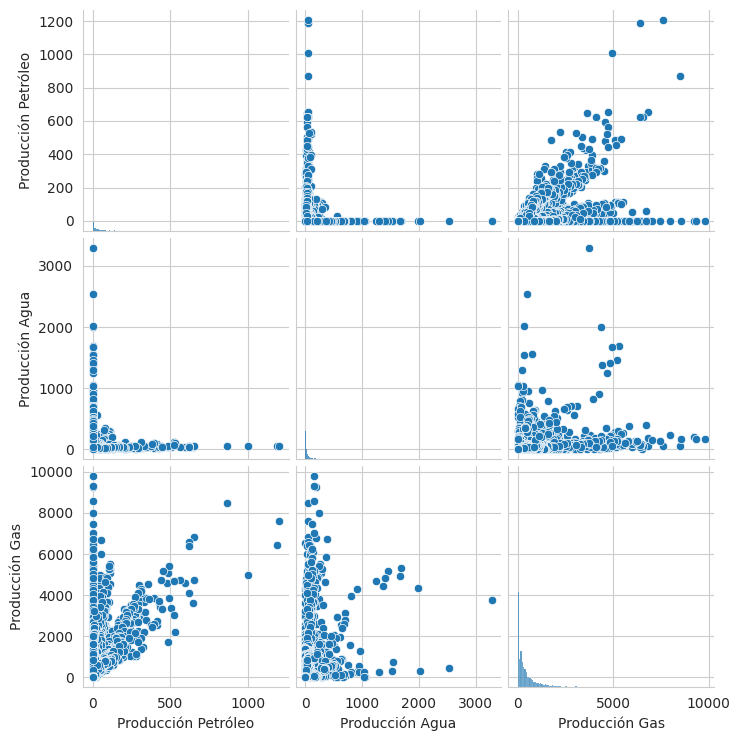

In [ ]:
# Filtrar los datos
precuyo_data = dt[dt['Formación Productiva'] == 'PRECUYO']

# Seleccionar las columnas numéricas
numeric_columns = ['Producción Petróleo', 'Producción Agua', 'Producción Gas']

# Columnas numéricas filtradas
numeric_precuyo_data = precuyo_data[numeric_columns]

# Visualizar
sns.pairplot(numeric_precuyo_data)

A continuación, se grafica el grado de correlación entre las principales variables de producción para todos los pozos con restricción a la variable "Formación Productiva", a través de la función .pairplot de Seaborn con paleta de color "Bright".

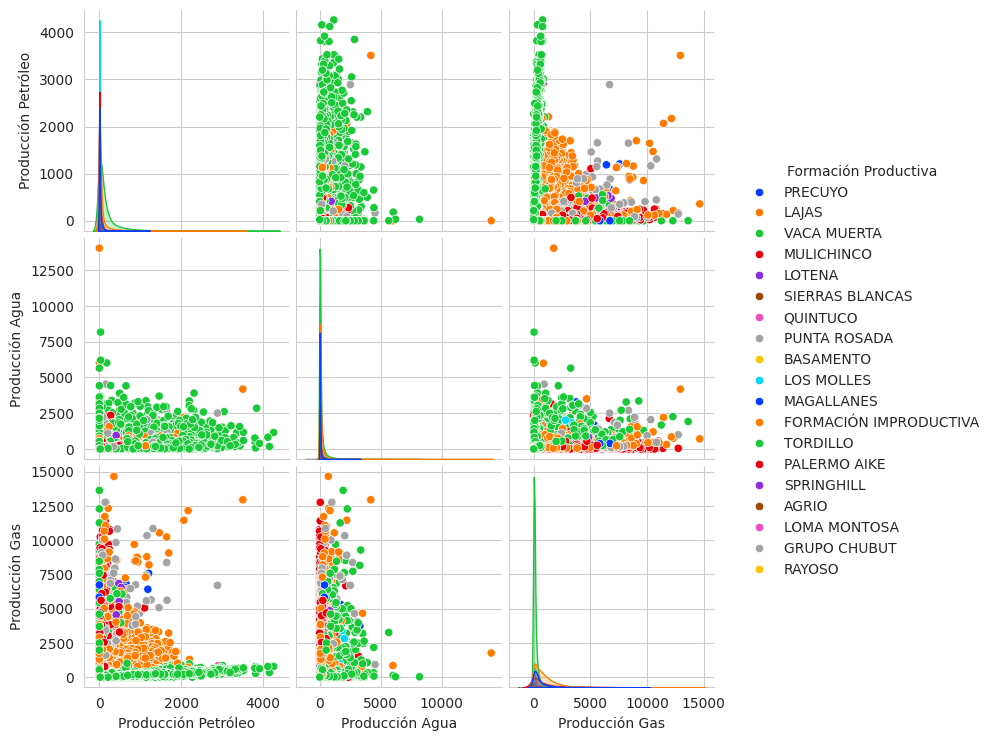

In [ ]:
data = dt[dt['Formación Productiva'].notnull()]

# Seleccionamos las columnas numéricas
numeric_columns = ['Producción Petróleo', 'Producción Agua', 'Producción Gas']

# Visualizar los datos utilizando
sns.pairplot(data, hue='Formación Productiva', palette='bright', vars=numeric_columns)

#Análisis exploratorio a través de la visualización e interpretación de mapas de calor y cálculo de coeficientes de *Pearson*

<Axes: >

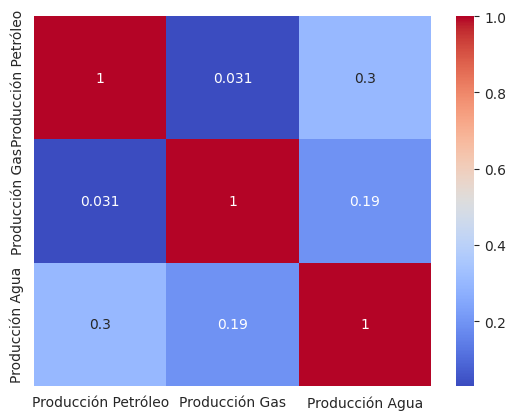

In [ ]:
selected_columns = ["Producción Petróleo", "Producción Gas", "Producción Agua"]

# Crear un nuevo DataFrame solo con las columnas seleccionadas
selected_data = dt[selected_columns]

# Generar el mapa de calor
sns.heatmap(selected_data.corr(), cmap='coolwarm', annot=True)

<Axes: ylabel='Formación Productiva-None'>

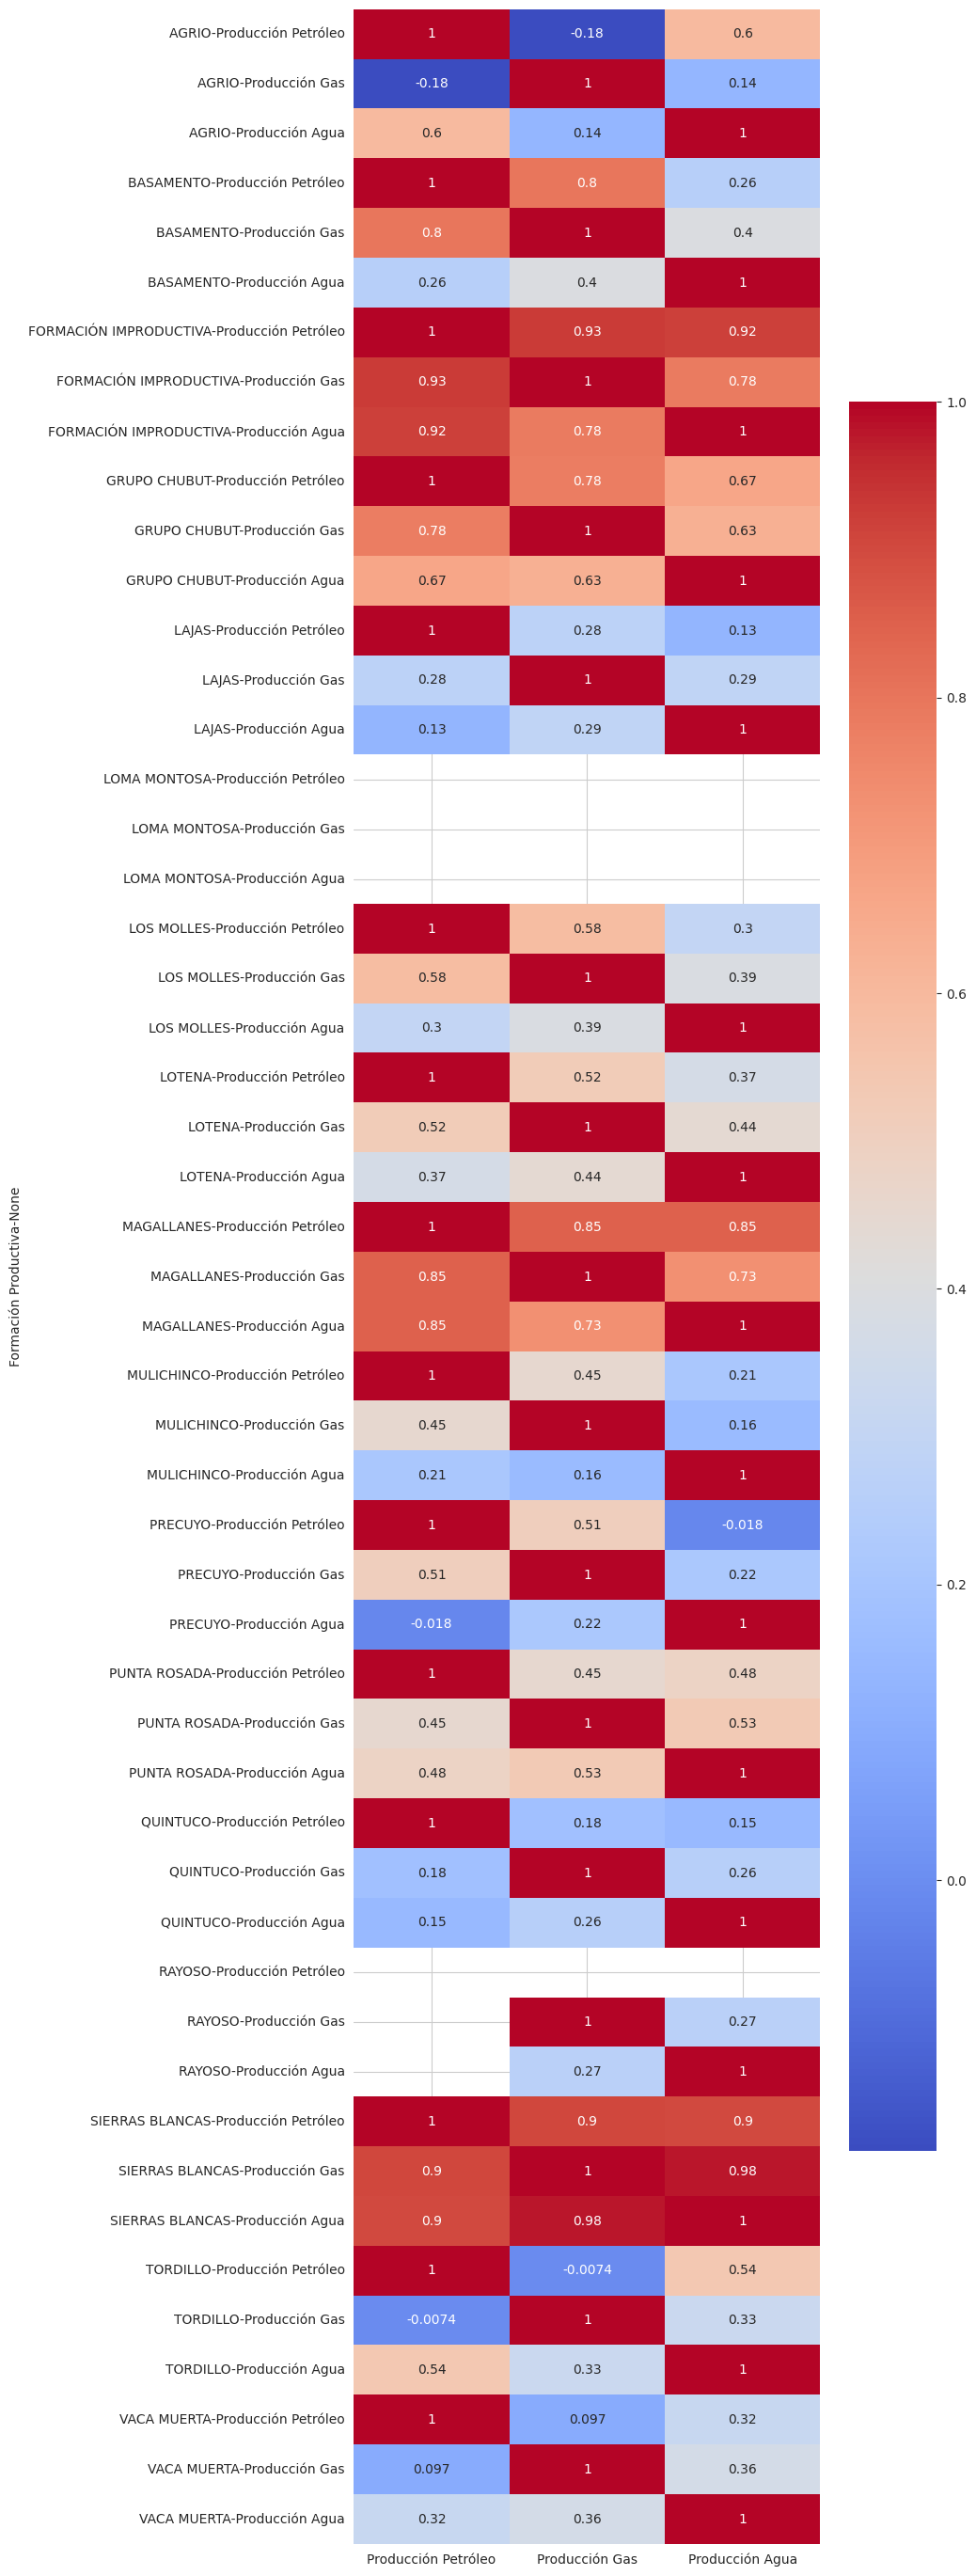

In [ ]:
# Se usa la variable categórica Formación con la que se desea condicionar las correlaciones
selected_columns = ["Producción Petróleo", "Producción Gas", "Producción Agua"]
# Se agrupan los datos por la variable categórica y se calculan las correlaciones para cada grupo
grouped_data = dt.groupby('Formación Productiva')[selected_columns].corr()

# Generar el mapa de calor
plt.figure(figsize=(8, 35))
sns.heatmap(grouped_data, cmap='coolwarm', annot=True)

<Axes: >

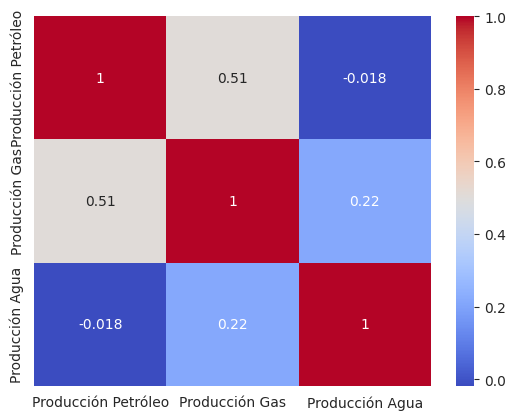

In [ ]:
# Filtrar el DataFrame para incluir solo las filas donde la variable categórica sea "PRECUYO"
filtered_data = dt[dt['Formación Productiva'] == 'PRECUYO']

# Calcular las correlaciones para las variables numéricas seleccionadas
correlation_matrix = filtered_data[selected_columns].corr()

# Generar el mapa de calor
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

El presente reporte analiza la correlación entre la producción de petróleo y otras variables relevantes en un campo petrolero. Se han calculado los coeficientes de correlación de Pearson para evaluar la relación lineal entre las variables.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Gas:** Es de **0.0318**, esta correlación indica una relación muy débil y prácticamente insignificante entre la producción de petróleo y la producción de gas.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Agua:** Es de **0.3007**, la correlación positiva moderada sugiere que existe una relación modesta entre la producción de petróleo y la producción de agua. Esto podría indicar una tendencia a medida que aumenta la producción de petróleo, también lo hace la producción de agua.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Gas filtrando por categoría PRECUYO de Formación Productiva:** Es de **0.5069**, cuando se filtra la producción de gas por PRECUYO, se observa una correlación positiva significativa entre la producción de petróleo y la producción de gas. Esto sugiere una relación más fuerte entre estas variables en este contexto específico.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Gas filtrando por LAJAS:** Es de **0.5069**, de manera similar al caso anterior, al filtrar la producción de gas por LAJAS, se obtiene una correlación positiva significativa entre la producción de petróleo y la producción de gas.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Agua filtrando por AGRIO:** Es de **0.5999**, al filtrar la producción de agua por **AGRIO**, se observa una correlación positiva más fuerte y significativa entre la producción de petróleo y la producción de agua.

* **Correlación de Pearson entre Producción de Petróleo y Producción de Agua filtrando por PRECUYO:** Es de **0.5999**, al filtrar la producción de agua por **PRECUYO**, se obtiene una correlación positiva más fuerte y significativa entre la producción de petróleo y la producción de agua.

# **Modelo de Regresión Lineal**

#Definición del objetivo y preparación de los datos

Luego de realizar el análisis exploratorio de los datos de la base seleccionada y encontrar relaciones lineales entre "Producción Petróleo" vs. "Producción Gas" y "Producción Agua" vs. "Producción Gas" para determinadas Formaciones Productivas, se ha decidido entrenar un modelo de regresión que tenga la capacidad de predecir la variable dependiente "Producción Gas" para la Formación Precuyano, tomando como variables independientes "Producción Petróleo" y "Producción Agua". Como segundo objetivo se hará la comparación entre dos modelos distintos de regresión.

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     65535 non-null  int64  
 1   Mes                     65535 non-null  int64  
 2   Id pozo                 65535 non-null  int64  
 3   Producción Petróleo     65535 non-null  float64
 4   Producción Gas          65535 non-null  float64
 5   Producción Agua         65535 non-null  float64
 6   Tipo Pozo               65156 non-null  object 
 7   Empresa                 65535 non-null  object 
 8   Sigla Pozo              65535 non-null  object 
 9   Profundidad             65535 non-null  float64
 10  Formación Productiva    65535 non-null  object 
 11  Area Permiso Concesión  65535 non-null  object 
 12  Área Yacimiento         65535 non-null  object 
 13  Cuenca                  65535 non-null  object 
 14  Provincia               65535 non-null

A continuación, se seleccionan las columnas de interés filtradas al PRECUYO y se genera una sub base con las mismas

In [ ]:
# Filtrar por Formación Productiva 'PRECUYO'
dt_precuyo = dt[dt['Formación Productiva'] == 'PRECUYO']

# Seleccionar solo las columnas deseadas
sub_dt = dt_precuyo[['Producción Petróleo', 'Producción Gas', 'Profundidad']]

In [ ]:
print(sub_dt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6164 entries, 0 to 65490
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Producción Petróleo  6164 non-null   float64
 1   Producción Gas       6164 non-null   float64
 2   Profundidad          6164 non-null   float64
dtypes: float64(3)
memory usage: 192.6 KB
None


In [ ]:
sub_dt.head()

,Producción Petróleo,Producción Gas,Profundidad
0,0.0,0.00,3650.0
7,0.0,222.06,3809.0
9,0.0,264.02,3600.0
13,0.0,0.00,3970.0
27,0.0,0.00,3700.0


In [ ]:
sub_dt.tail()

,Producción Petróleo,Producción Gas,Profundidad
64782,0.0,0.00,3809.0
64783,0.0,0.00,3600.0
65355,0.0,5841.83,3265.0
65356,0.0,1114.29,3740.0
65490,0.0,832.80,3400.0


In [ ]:
sub_dt.shape

(6164, 3)

A continuación, a partir del análisis exploratorio univariado y bivariado  de las principales variables de producción filtradas por PRECUYO, se filtra la Producción de Gas para valores mayor a 800. Por debajo de este valor hay valores sesgados en la Producción de Agua. Luego, si se filtran los valores bajos de Producción Petróleo se pierde mucha data en la subase "sub_dt_filtered", ya que para valores bajos de petróleo puede haber pozos que produzcan mucho gas.

In [ ]:
sub_dt_filtered = sub_dt[
    (sub_dt['Producción Petróleo'] >= 165) & (sub_dt['Producción Petróleo'] <= 1000)]

In [ ]:
sub_dt_filtered.shape

(151, 3)

#Definición del conjunto de entrenamiento y prueba

PASO 1: **Importar bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

PASO 2: **Se dividen los datos en conjunto X e y,** donde y es la variable a predecir u objetivo y X son las variables independientes

In [ ]:
X = sub_dt_filtered[['Producción Petróleo', 'Profundidad']]  # Características
y = sub_dt_filtered['Producción Gas']  # Variable objetivo (tarjet)

PASO 3: **Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.** (Split). Como test size se usará 0.1, porque la limpieza para buscar la linealidad entre las variables del modelo produjo una pérdida sustancial de datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#en el paso anterior como test size se usó 0.1, porque la limpieza para buscar la linealidad entre las variables del modelo produjo una pérdida sustancial de datos

#Fase Entrenamiento: Crear y ajustar el modelo de Regresión Lineal y Fase Prueba: Realizar predicciones en el conjunto de prueba y evaluar la precisión.

In [ ]:
# Crear el modelo de regresión lineal
Modelo_RL = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
Modelo_RL.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predecir los valores de salida para los datos de prueba
y_pred = Modelo_RL.predict(X_test)

**Error cuadrático medio (MSE)**

In [ ]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

40540.977111306944
201.34790068760822


El valor de MSE cercano a 40.541 es aceptable si se considera que el orden de magnitud de la variable objetivo "Producción Gas" filtrada al PRECUYO, está principalmente entre 500 y 1000. Por otro lado, si la media de Producción de Gas al PRECUYO es igual a 591 un RMSE de 201 (34% de error), indica que el modelo tiene un moderado nivel de predicción. **Dado que la relación lineal entre "Producción Petróleo" y "Producción Gas" se pierde cuando el pozo es gasífero, se tuvieron que eliminar muchos datos de Producción Petróleo bajos (<165). Esto impactó negativamente en la capacidad predictiva del modelo de Regresión Lineal.**

#**Segundo modelo de Regresión (Ridge)**

Para aplicar el modelo de Regresión Ridge, se usará una nueva sub base de las principales variables de producción pero restringidas a la Formación Productiva MAGALLANES, que presenta coeficientes de Pearson más altos respecto al PRECUYO entre las variables Producción Petróleo, Gas y Agua.

A continuación, se seleccionan las columnas de interés filtradas a la Formación Magallanes y se genera una sub base con las mismas

In [ ]:
# Filtrar por Formación Productiva 'MAGALLANES'
dt_magallanes = dt[dt['Formación Productiva'] == 'MAGALLANES']

# Seleccionar solo las columnas deseadas
clean_dt = dt_magallanes[['Producción Petróleo', 'Producción Gas', 'Producción Agua']]

In [ ]:
print(clean_dt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 3504 to 59065
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Producción Petróleo  978 non-null    float64
 1   Producción Gas       978 non-null    float64
 2   Producción Agua      978 non-null    float64
dtypes: float64(3)
memory usage: 30.6 KB
None


In [ ]:
clean_dt.shape

(978, 3)

PASO 1: Se dividen los datos en conjunto X e y, donde y es la variable a predecir u objetivo y X son las variables independientes

In [ ]:
Xm = clean_dt[['Producción Petróleo', 'Producción Agua']]  # Características
ym = clean_dt['Producción Gas']  # Variable objetivo (tarjet)

PASO 2: **Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.** (Split). Como test size se usará 0.2, porque la limpieza para buscar la linealidad entre las variables del modelo produjo una pérdida sustancial de datos

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, test_size=0.1, random_state=42)
#en el paso anterior como test size se usó 0.1, porque la limpieza para buscar la linealidad entre las variables del modelo produjo una pérdida sustancial de datos

#Fase Entrenamiento: Crear y ajustar el modelo de Regresión Ridge y Fase Prueba: Realizar predicciones en el conjunto de prueba y evaluar la precisión.

In [ ]:
# Crear el modelo de regresión lineal
Modelo_Ridge = Ridge()

# Ajustar el modelo a los datos de entrenamiento
Modelo_Ridge.fit(Xm_train, ym_train)

Ridge()

In [ ]:
# Predecir los valores de salida para los datos de prueba
y_pred_Ridge = Modelo_Ridge.predict(Xm_test)

**Error cuadrático medio (mse)**

In [ ]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

40540.977111306944
201.34790068760822


El error cuadrático (rmse) = 201, nuevamente es un error aceptable cercano al 30%. Sin embargo, la capacidad predictiva del modelo es moderada

#**CONCLUSION**

El grado de correlación, representado visualmente por los gráficos de dispersión, mapas de calor y numéricamente por los coeficientes de Pearson, suele ser bajo entre las variables de producción (Producción Petróleo, Producción Gas y Producción Agua) sino se restringe a Formación Productiva. En general, las formaciones geológicas que tienen altos coeficientes de Pearson entre volúmenes de fluido son reservorios tight (e.g. MAGALLANES). Los reserovrios no convencionales como PRECUYO (formación principalmente gasífera), tienen una buena correlación entre petróleo y gas, si el pozo es dominantemente gasífero, es decir, si el volumen de petróleo es muy bajo el volumen de gas suele ser muy alto y no se corresponde con la recta de correlación lineal. Por último, se confirmó lo planteado en la hipótesis: los modelos de Regresión Lineal aplicados a la variable Producción Gas como variable objetivo, tienen errores relativos moderados como consecuencia de que la linearidad no se cumple en todo el rango de valores de las variables de producción y, por otro lado, el número de filas se vio considerablemente reducido por la limpieza de la sub-base construida para los dos modelos de regresión.